<a href="https://colab.research.google.com/github/Hyperstrom/Time-Series-Forcasting/blob/main/nadia__rice_price_prediction_with__mutlple_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting using Transformers** 📈🤖

This notebook demonstrates the application of Transformer models for time series forecasting. Originally designed for natural language processing, Transformer models can be effectively utilized for sequential data prediction.

## Table of Contents
1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
3. [Model Architecture](#model-architecture)
4. [Training the Model](#training-the-model)
5. [Evaluation](#evaluation)
6. [Conclusion](#conclusion)

## Introduction 📘 <a id="introduction"></a>
Time series forecasting is essential in various fields such as finance, meteorology, and demand forecasting. While traditional models like ARIMA and LSTM have been extensively used, Transformers offer a robust alternative due to their ability to handle long-range dependencies and parallelize training.

In this notebook, we will:
- Load and preprocess the time series data.
- Construct a Transformer model for forecasting.
- Train and evaluate the model.
- Visualize the results.

# **Data Preparation** 🗂️ <a id="data-preparation"></a>
The initial step involves loading and preprocessing the time series data. This includes:
- Importing the necessary libraries.
- Reading the dataset.
- Visualizing the data to understand underlying patterns.
- Scaling the data to normalize the values, which enhances model performance.


 import necessary libraries to process the data

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

##**Data**

### Local Market Rice Price Data for Bethuadahari Market, Nadia

The following dataset represents the rice price information collected from the Bethuadahari market in Nadia. This data is sourced from the Government's official website, Agmarknet.

#### Market Information:
- **Market Name:** Bethuadahari Market
- **District:** Nadia
- **State:** West Bengal
- **Country:** India

#### Data Source:
- **Website:** [Agmarknet](https://agmarknet.gov.in/ResearchStudies/Default.aspx)
- **Provider:** Government of India

#### Rice Price Data Overview:
The dataset includes the following columns:

1. **Date**: The date on which the data was recorded.
2. **Variety**: The specific type or variety of rice being priced.
3. **Minimum Price (INR/quintal)**: The minimum price at which the rice variety was sold on the given date.
4. **Maximum Price (INR/quintal)**: The maximum price at which the rice variety was sold on the given date.
5. **Modal Price (INR/quintal)**: The most frequently quoted price for the rice variety on the given date.


In [ ]:
file_path = 'OneDrive//Desktop//nadia.xlsx'
data = pd.read_excel(file_path)
data.head()


,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nadia,Bethuadahari,Rice,Fine,FAQ,4400,4600,4500,2024-06-07
1,2,Nadia,Bethuadahari,Rice,Fine,FAQ,4400,4600,4500,2024-06-06
2,3,Nadia,Bethuadahari,Rice,Fine,FAQ,4400,4600,4500,2024-06-05
3,4,Nadia,Bethuadahari,Rice,Fine,FAQ,4300,4500,4400,2024-06-04
4,5,Nadia,Bethuadahari,Rice,Fine,FAQ,4300,4500,4400,2024-06-03


now clean the data -->



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl no.                     5425 non-null   int64         
 1   District Name              5425 non-null   object        
 2   Market Name                5425 non-null   object        
 3   Commodity                  5425 non-null   object        
 4   Variety                    5425 non-null   object        
 5   Grade                      5425 non-null   object        
 6   Min Price (Rs./Quintal)    5425 non-null   int64         
 7   Max Price (Rs./Quintal)    5425 non-null   int64         
 8   Modal Price (Rs./Quintal)  5425 non-null   int64         
 9   Price Date                 5425 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 424.0+ KB


In [ ]:
# drop Grade , Variety column

data = data.drop(['Grade', 'Variety'], axis=1)


In [ ]:
data.shape

(5425, 8)

In [ ]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nadia,Bethuadahari,Rice,4400,4600,4500,2024-06-07
1,2,Nadia,Bethuadahari,Rice,4400,4600,4500,2024-06-06
2,3,Nadia,Bethuadahari,Rice,4400,4600,4500,2024-06-05
3,4,Nadia,Bethuadahari,Rice,4300,4500,4400,2024-06-04
4,5,Nadia,Bethuadahari,Rice,4300,4500,4400,2024-06-03


##**Plot the data all over the time**
---
* plot Max price data
* plot Min price data
* plot Modal price data




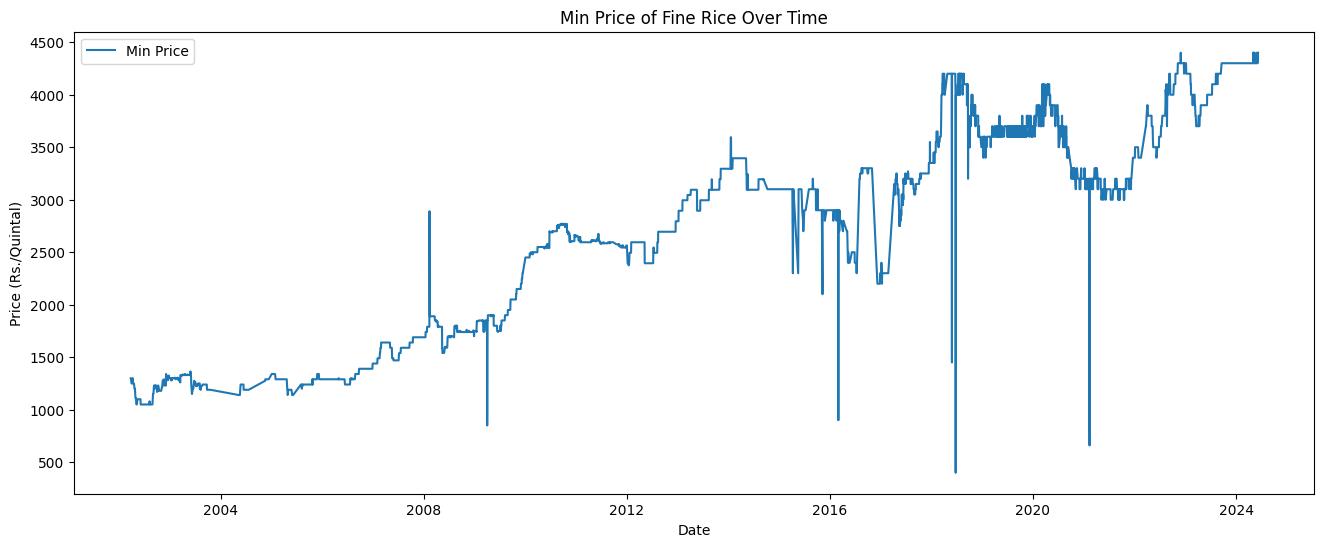

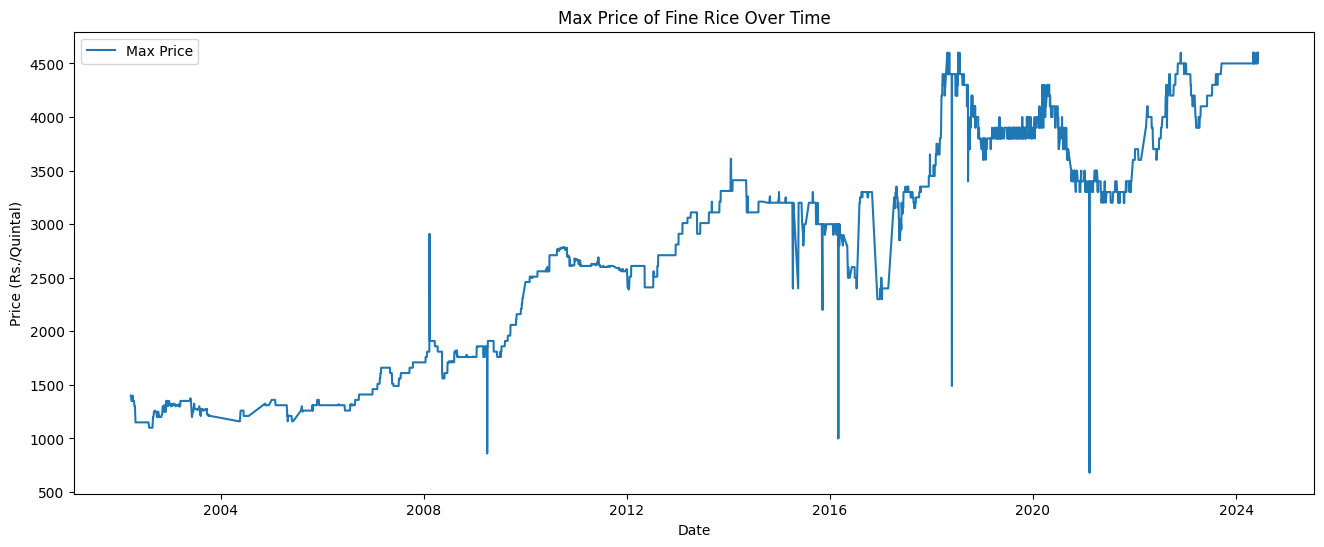

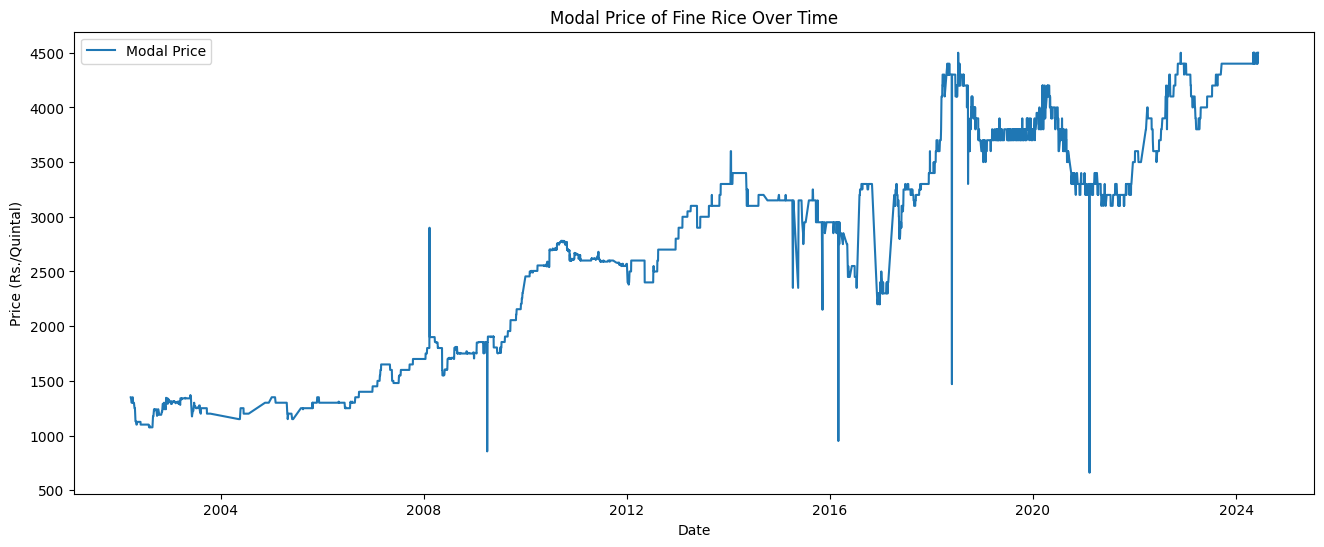

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(data['Price Date'], data['Min Price (Rs./Quintal)'], label='Min Price')
plt.title('Min Price of Fine Rice Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(data['Price Date'], data['Max Price (Rs./Quintal)'], label='Max Price')
plt.title('Max Price of Fine Rice Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(data['Price Date'], data['Modal Price (Rs./Quintal)'], label='Modal Price')
plt.title('Modal Price of Fine Rice Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()


In [ ]:
#arrange the data date wise asending order also reset the index value and SL no.

data = data.sort_values('Price Date', ascending=True).reset_index(drop=True)
data['Sl no.'] = np.arange(1, len(data) + 1)


In [ ]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nadia,Bethuadahari,Rice,1300,1400,1350,2002-03-26
1,2,Nadia,Bethuadahari,Rice,1300,1400,1350,2002-03-27
2,3,Nadia,Bethuadahari,Rice,1250,1350,1300,2002-04-01
3,4,Nadia,Bethuadahari,Rice,1250,1350,1300,2002-04-02
4,5,Nadia,Bethuadahari,Rice,1250,1350,1300,2002-04-03


In this section, we will separate the rice price data from the dataset, perform a train-test split, convert the data to a NumPy array, and apply standard scaling to prepare the data for model input.

##**Steps to Process the Data** 📊:

1. **Separate the Price Data** 📅💰:
   - Extract the relevant columns (Minimum Price, Maximum Price, Modal Price) from the dataset.

2. **Perform Train-Test Split** 🔀📚:
   - Divide the data into training and testing sets to evaluate the model's performance.

3. **Convert to NumPy Array** 🔄📐:
   - Transform the pandas DataFrame into a NumPy array for compatibility with machine learning models.

4. **Apply Standard Scaling** 🔧⚖️:
   - Normalize the data using StandardScaler to ensure the features are on a similar scale.
-------------------------------

1. **Separate the Price Data**:
   - Extract the `Minimum Price`, `Maximum Price`, and `Modal Price` columns from the original DataFrame.

In [ ]:
max_data = data['Max Price (Rs./Quintal)']
min_data = data['Min Price (Rs./Quintal)']
modal_data = data['Modal Price (Rs./Quintal)']

In [ ]:
max_data[10:20]

10    1350
11    1300
12    1300
13    1300
14    1300
15    1150
16    1150
17    1150
18    1150
19    1150
Name: Max Price (Rs./Quintal), dtype: int64

In [ ]:
print("Total Length of Max price data", len(max_data))
print("Total length of Min min price data",len(min_data))
print("Total length of modal price data",len(modal_data))

Total Length of Max price data 5425
Total length of Min min price data 5425
Total length of modal price data 5425


**Perform Train-Test Split**:
* Training data takes 80% of the data
* Testing data takes 20% of the data

In [ ]:
def train_test_split(data):
    training_size = int(len(data) * 0.80)
    test_size = len(data) - training_size
    train_data = data[0:training_size]
    test_data = data[training_size:len(data)]
    return train_data, test_data

In [ ]:
max_data_train, max_data_test = train_test_split(max_data)
min_data_train, min_data_test = train_test_split(min_data)
modal_data_train, modal_data_test = train_test_split(modal_data)

In [ ]:
modal_data_train

0       1350
1       1350
2       1300
3       1300
4       1300
        ... 
4335    3900
4336    3800
4337    3800
4338    3900
4339    3800
Name: Modal Price (Rs./Quintal), Length: 4340, dtype: int64

In [ ]:
print("Length of training data : ", len(max_data_train))
print("Length of testing data : ", len(max_data_test))

Length of training data :  4340
Length of testing data :  1085


In [ ]:
max_data_train.shape

(4340,)

 **3. and 4. Convert the data into numpy array and perform StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

# reshape the max price data
max_data_train = max_data_train.to_numpy().reshape(-1, 1)
max_data_test = max_data_test.to_numpy().reshape(-1, 1)

# reshape the min price data
min_data_train = min_data_train.to_numpy().reshape(-1, 1)
min_data_test = min_data_test.to_numpy().reshape(-1, 1)

# reshape the modal price data
modal_data_train = modal_data_train.to_numpy().reshape(-1, 1)
modal_data_test = modal_data_test.to_numpy().reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Apply the scaler to the max price data
max_data_train = scaler.fit_transform(max_data_train).flatten().tolist()
max_data_test = scaler.transform(max_data_test).flatten().tolist()

# Apply the scaler to the min price data
min_data_train = scaler.fit_transform(min_data_train).flatten().tolist()
min_data_test = scaler.transform(min_data_test).flatten().tolist()

# Apply the scaler to the modal price data
modal_data_train = scaler.fit_transform(modal_data_train).flatten().tolist()
modal_data_test = scaler.transform(modal_data_test).flatten().tolist()


In [ ]:
len(modal_data_train)

4340

In [ ]:
len(modal_data_test)

1085

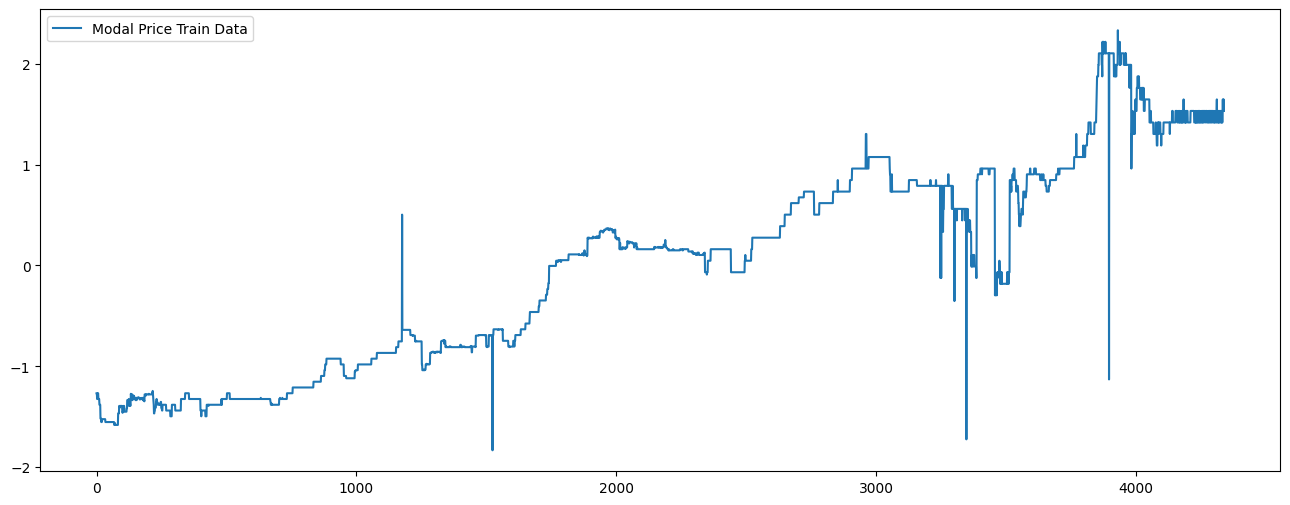

In [ ]:
# plot modal_data_train

plt.figure(figsize=(16, 6))
plt.plot(modal_data_train, label='Modal Price Train Data')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

## **Time Series Sequence Data Preparation**

For time series forecasting, data needs to be organized in a sequential manner to train models effectively. Let's consider an example where we have a dataset representing daily price data:

```
10 11 12 13 14 15 16 17 18 19 20
```

If we choose a sequence window length of 5, the input and output pairs would be as follows:

| Input                               | Output |
|-------------------------------------|--------|
| 10 11 12 13 14                      | 15     |
| 11 12 13 14 15                      | 16     |
| 12 13 14 15 16                      | 17     |
| ...                                 | ...    |

Here, each input sequence contains 5 consecutive data points, and the corresponding output is the next data point in the sequence. This process continues for the entire dataset.

### Sequence Window Length

In this example, a sequence window length of 365 is chosen, indicating that each input sequence contains 365 consecutive data points.

### Data Splitting

The dataset is split into training and testing data. Training data is used to train the model, while testing data is used to evaluate its performance. Both training and testing datasets undergo the sequence window transformation.

### Tensor Dataset Creation

After organizing the data into sequences, it is converted into a `TensorDataset`, which is a PyTorch-specific data structure. This dataset contains batches of input-output pairs. For each batch, there are 32 sequences, each containing 365 input data points and 1 output data point.


#### Example Sequence Table:

| Input                                   | Output |
|-----------------------------------------|--------|
| 1 2 3 4 5 ... 360 361 362 363 364 365   | 366    |
| 2 3 4 5 6 ... 361 362 363 364 365 366   | 367    |
| 3 4 5 6 7 ... 362 363 364 365 366 367   | 368    |
| ...                                     | ...    |



### DataLoader Configuration

A `DataLoader` is then created to load the tensor dataset. The DataLoader is configured with a batch size of 32, ensuring that each batch contains 32 sequences. Additionally, the training data is shuffled to enhance the model's learning process by presenting data in random order during training.


### Combine dataloader

This code defines a `CombinedDataset` class and creates data loaders for training and testing datasets. This class commbine the max price , min price and modal price


By following these steps, the data is prepared in a suitable format for training time series forecasting models using deep learning techniques.

In [ ]:
#make data list data into sequence of input and output

SEQUENCE_LENGTH = 365
def sequence(seq_len, data):
  x =[]
  y =[]
  for i in range(len(data)-seq_len):
    window = data[i:i+seq_len]
    after_window = data[i+seq_len]
    x.append(window)
    y.append(after_window)
  return torch.tensor(x, dtype = torch.float32).view(-1, seq_len, 1), torch.tensor(y, dtype = torch.float32).view(-1, 1)

#X and Y split for train and test

#max price data
max_data_x_train , max_data_y_train = sequence(SEQUENCE_LENGTH, max_data_train)
max_data_x_test , max_data_y_test = sequence(SEQUENCE_LENGTH, max_data_test)

#min price data
min_data_x_train , min_data_y_train = sequence(SEQUENCE_LENGTH, min_data_train)
min_data_x_test , min_data_y_test = sequence(SEQUENCE_LENGTH, min_data_test)

#modal price data
modal_data_x_train , modal_data_y_train = sequence(SEQUENCE_LENGTH, modal_data_train)
modal_data_x_test , modal_data_y_test = sequence(SEQUENCE_LENGTH, modal_data_test)

#Setup data loaders for batch

#Max data-->
max_train_dataset = TensorDataset(max_data_x_train, max_data_y_train)
max_train_loader = DataLoader(max_train_dataset, batch_size=32, shuffle=True)

max_test_dataset = TensorDataset(max_data_x_test, max_data_y_test)
max_test_loader = DataLoader(max_test_dataset, batch_size=32, shuffle=False)

#Min data -->
min_train_dataset = TensorDataset(min_data_x_train, min_data_y_train)
min_train_loader = DataLoader(min_train_dataset, batch_size=32, shuffle=True)

min_test_dataset = TensorDataset(min_data_x_test, min_data_y_test)
min_test_loader = DataLoader(min_test_dataset, batch_size=32, shuffle=False)

#Modal data -->
modal_train_dataset = TensorDataset(modal_data_x_train, modal_data_y_train)
modal_train_loader = DataLoader(modal_train_dataset, batch_size=32, shuffle=True)

modal_test_dataset = TensorDataset(modal_data_x_test, modal_data_y_test)
modal_test_loader = DataLoader(modal_test_dataset, batch_size=32, shuffle=False)

In [ ]:
# see the batch sizes in train loader
for batch in modal_train_loader:
  x, y = batch
  print(x.shape, y.shape)
  break


torch.Size([32, 365, 1]) torch.Size([32, 1])


In [ ]:
#for training process the input X and output Y size
print(f"X_train shape  = {modal_data_x_train.shape}\n Y_train shape = {modal_data_y_train.shape}")
print("\n")
#for testing process the X and Y
print(f"X_test shape  = {modal_data_x_test.shape}\n Y_test shape = {modal_data_y_test.shape}")

X_train shape  = torch.Size([3975, 365, 1])
 Y_train shape = torch.Size([3975, 1])


X_test shape  = torch.Size([720, 365, 1])
 Y_test shape = torch.Size([720, 1])


This code defines a `CombinedDataset` class and creates data loaders for training and testing datasets. First, necessary libraries are imported. Then, the `CombinedDataset` class is defined with initialization, length, and item retrieval methods. Next, combined datasets are created by passing individual datasets for maximum, minimum, and modal values. Finally, data loaders are created for both training and testing datasets with a batch size of 32, and training data is shuffled for better learning.






In [ ]:
from torch.utils.data import DataLoader, Dataset

class CombinedDataset(Dataset):
    def __init__(self, max_dataset, min_dataset, modal_dataset):
        self.max_dataset = max_dataset
        self.min_dataset = min_dataset
        self.modal_dataset = modal_dataset

    def __len__(self):
        return min(len(self.max_dataset), len(self.min_dataset), len(self.modal_dataset))

    def __getitem__(self, idx):
        max_x, max_y = self.max_dataset[idx]
        min_x, min_y = self.min_dataset[idx]
        modal_x, modal_y = self.modal_dataset[idx]
        return (max_x, min_x, modal_x), (max_y, min_y, modal_y)

# Create combined datasets
train_dataset = CombinedDataset(max_train_dataset, min_train_dataset, modal_train_dataset)
test_dataset = CombinedDataset(max_test_dataset, min_test_dataset, modal_test_dataset)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
for batchs in train_loader:
  x, y = batchs
  print(x[0].shape, y[0].shape)
  break

torch.Size([32, 365, 1]) torch.Size([32, 1])


The `MultiInputMultiOutputTransformer` is a PyTorch neural network model designed for multi-input, multi-output tasks, specifically tailored for time series forecasting. It utilizes the transformer architecture, which has been widely successful in sequence-to-sequence tasks.

# **Model Architecture:**
- **Input Embeddings:**
  - Three linear layers (`embedding_max`, `embedding_min`, `embedding_modal`) transform the input data of dimension `input_dim` into a higher-dimensional representation (`model_dim`).
- **Encoder Layers:**
  - Three transformer encoder blocks (`encoder_max`, `encoder_min`, `encoder_modal`) process the embedded input data. Each block consists of `num_layers` transformer encoder layers, each with `model_dim` dimensions and `num_heads` attention heads.
- **Fully Connected Layers:**
  - Three linear layers (`fc_max`, `fc_min`, `fc_modal`) perform the final prediction. They transform the encoded representations to the desired output dimension (`output_dim`).

### Forward Pass:
- The input data is passed through the respective embedding layers.
- The embedded inputs are then processed by the transformer encoder blocks.
- The output of the last time step from each encoder is fed into the corresponding fully connected layer for prediction.
- The model outputs three predictions (`output_max`, `output_min`, `output_modal`) corresponding to the maximum, minimum, and modal values respectively.

### Initialization:
- The model is initialized with specific parameters:
  - `input_dim`: Dimension of input data.
  - `model_dim`: Dimensionality of the model's hidden states.
  - `num_heads`: Number of attention heads in the multi-head attention mechanism.
  - `num_layers`: Number of transformer encoder layers.
  - `output_dim`: Dimensionality of the output.

### Example Usage:
- An instance of the model is created with specified parameters and moved to the GPU ('cuda') for computation.

This model architecture is suitable for tasks where multiple inputs are provided, and multiple outputs need to be predicted simultaneously, such as forecasting time series data with different characteristics.

In [ ]:
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

class MultiInputMultiOutputTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim):
        super(MultiInputMultiOutputTransformer, self).__init__()

        self.embedding_max = nn.Linear(input_dim, model_dim)
        self.embedding_min = nn.Linear(input_dim, model_dim)
        self.embedding_modal = nn.Linear(input_dim, model_dim)

        self.encoder_max = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads),
            num_layers=num_layers
        )
        self.encoder_min = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads),
            num_layers=num_layers
        )
        self.encoder_modal = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads),
            num_layers=num_layers
        )

        self.fc_max = nn.Linear(model_dim, output_dim)
        self.fc_min = nn.Linear(model_dim, output_dim)
        self.fc_modal = nn.Linear(model_dim, output_dim)

    def forward(self, x_max, x_min, x_modal):
        x_max = self.embedding_max(x_max)
        x_min = self.embedding_min(x_min)
        x_modal = self.embedding_modal(x_modal)

        enc_max = self.encoder_max(x_max)
        enc_min = self.encoder_min(x_min)
        enc_modal = self.encoder_modal(x_modal)

        # Use the output of the last time step for prediction
        output_max = self.fc_max(enc_max[:, -1, :])
        output_min = self.fc_min(enc_min[:, -1, :])
        output_modal = self.fc_modal(enc_modal[:, -1, :])

        return output_max, output_min, output_modal

# Initialize the model
model = MultiInputMultiOutputTransformer(input_dim=1, model_dim=128, num_heads=8, num_layers=3, output_dim=1).to('cuda')


Model summary

In [ ]:
print(model)

MultiInputMultiOutputTransformer(
  (embedding_max): Linear(in_features=1, out_features=128, bias=True)
  (embedding_min): Linear(in_features=1, out_features=128, bias=True)
  (embedding_modal): Linear(in_features=1, out_features=128, bias=True)
  (encoder_max): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (encoder_min): TransformerEncoder(
    (l

In [ ]:
# print the total model parameter and model size

# Print the total number of trainable parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print(f"Total Trainable Parameters: {total_params}")

# Print the model size in megabytes
model_size = sum(p.element_size() * p.nelement() for p in model.parameters()) / 1024**2
print(f"Model Size (MB): {model_size:.2f}")


Total Trainable Parameters: 5338371
Model Size (MB): 20.36


## Model Architecture Visualization using torchviz and onnx

To visualize the model architecture, we'll be using `torchviz` and `onnx` Python libraries.

### About torchviz and onnx:
- **torchviz:** `torchviz` is a PyTorch library that provides visualization tools for PyTorch neural networks. It allows users to create dynamic computational graphs of their models, which can be helpful for understanding the flow of data and operations during forward passes.
- **onnx:** `onnx` is an open-source neural network exchange format that allows interoperability between different deep learning frameworks. It enables users to export models trained in PyTorch to the ONNX format, which can then be visualized and executed in other frameworks like TensorFlow and Caffe2.

### Model Visualization:
To visualize the model architecture, we'll first export the model to the ONNX format using `onnx`. Then, we'll use `torchviz` to generate a dynamic computational graph of the model. This will provide a visual representation of the model's structure, including the flow of data and operations through its layers. By visualizing the model architecture, we can gain insights into its design and understand how input data is processed and transformed as it passes through the model.

In [ ]:
from torchviz import make_dot

# Initialize the model
model = MultiInputMultiOutputTransformer(input_dim=1, model_dim=128, num_heads=8, num_layers=3, output_dim=1).to('cuda')

# Create dummy inputs
x_max = torch.randn(1, 10, 1).to('cuda')
x_min = torch.randn(1, 10, 1).to('cuda')
x_modal = torch.randn(1, 10, 1).to('cuda')

# Perform a forward pass
output_max, output_min, output_modal = model(x_max, x_min, x_modal)

# Visualize the computational graph and save as PNG format
dot = make_dot((output_max, output_min, output_modal), params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('model_graph', directory='./', cleanup=True)

'model_graph.png'

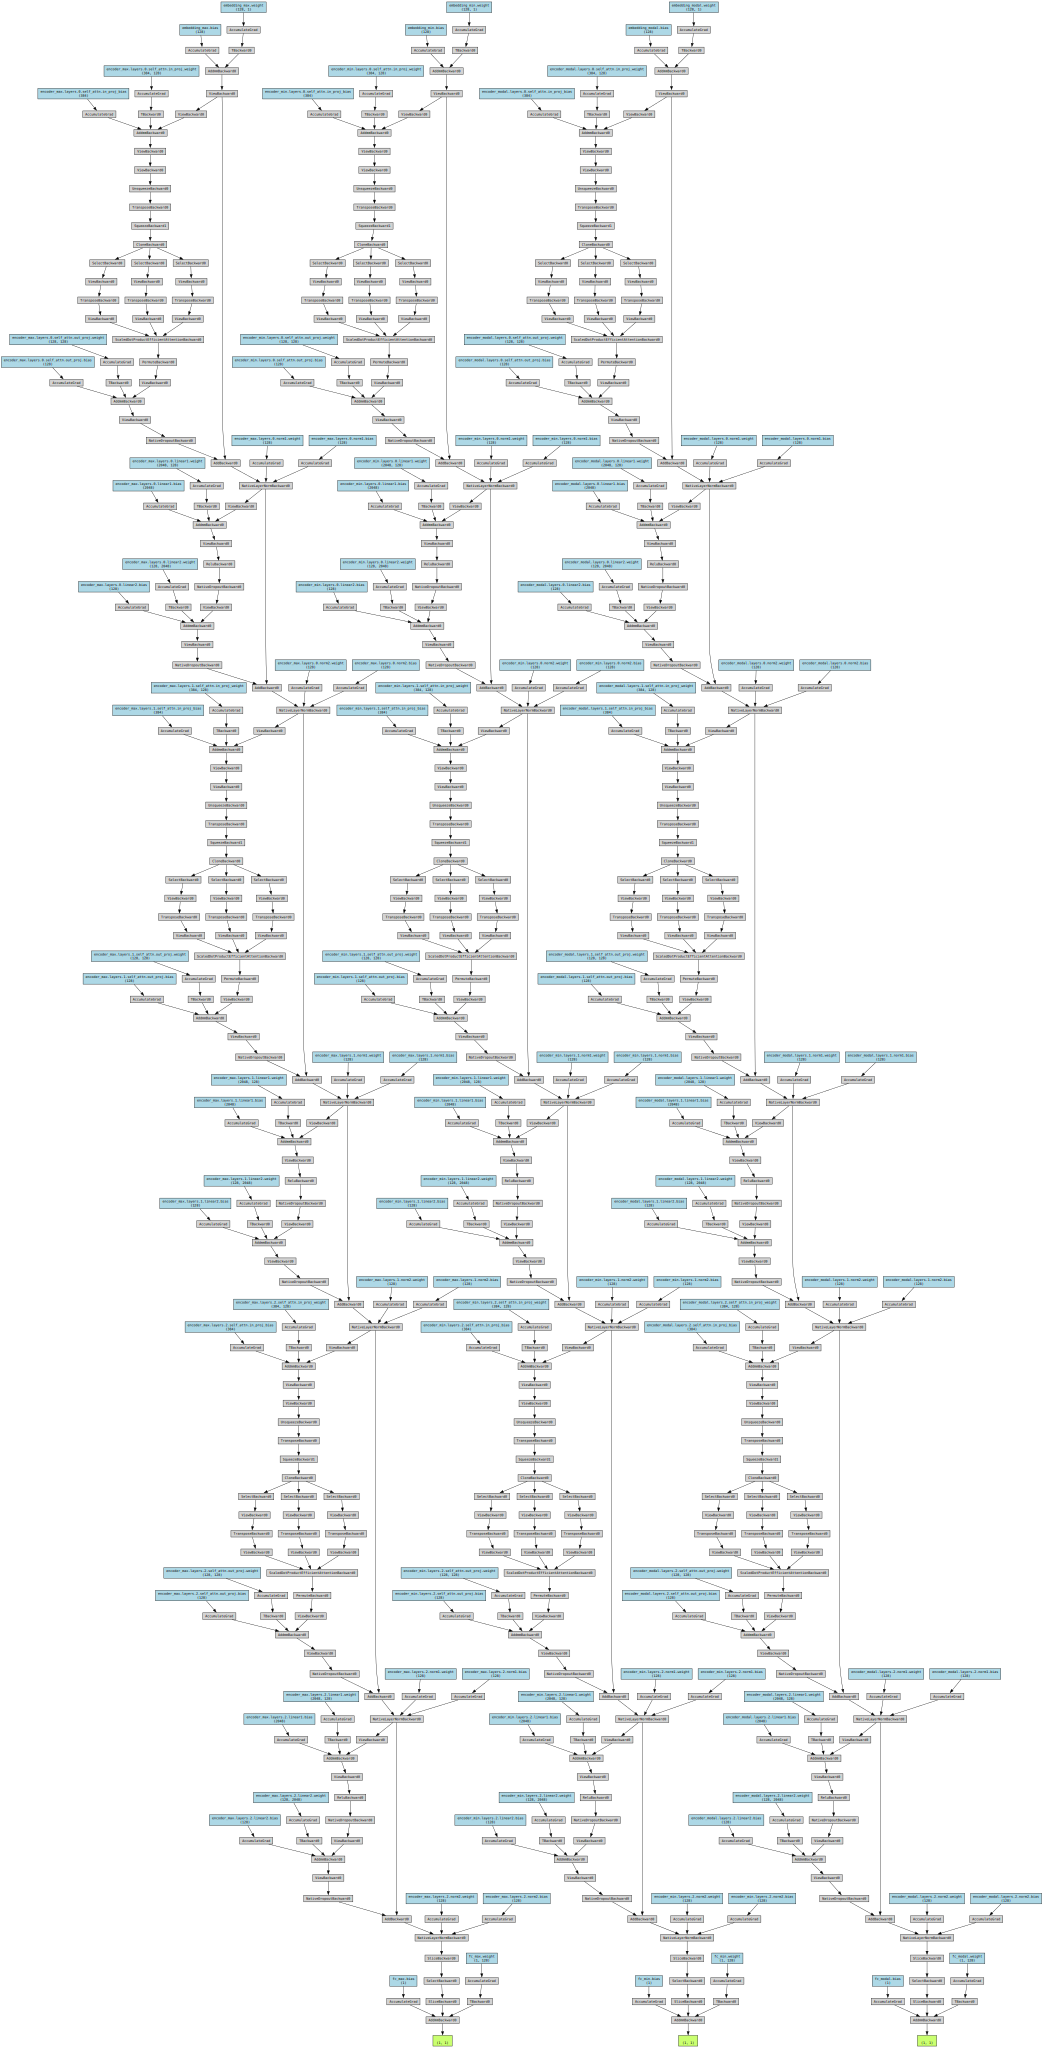

In [ ]:
make_dot((output_max, output_min, output_modal), params=dict(model.named_parameters()))

In [ ]:
import torch.onnx
from torch.autograd import Variable

# Define an instance of your model
model = MultiInputMultiOutputTransformer(input_dim=1, model_dim=128, num_heads=8, num_layers=3, output_dim=1).to('cuda')

# Provide an example input to the model
dummy_input_max = torch.randn(1, 365, 1).to('cuda')
dummy_input_min = torch.randn(1, 365, 1).to('cuda')
dummy_input_modal = torch.randn(1, 365, 1).to('cuda')

# Export the model to ONNX format
torch.onnx.export(model, (dummy_input_max, dummy_input_min, dummy_input_modal), "model.onnx", verbose=True)


view the model.onxx the onxx format from the [Netron app](https://netron.app/)

open the netron app and open the model.onxx in the web site to see the all model parameters and model dimensites

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*Rvsd3xtjRNRWHXUiio5gTA.png" alt="Your newtron" width="600">

In this website open the model.onxx



# **Training the Model**

1. **Define Criterion, Optimizer, and Scheduler**:
    - Set the loss function as Mean Squared Error (MSE) using `nn.MSELoss()`.
    - Initialize the optimizer as Adam with a learning rate of 0.001 and weight decay of 1e-5.
    - Use `ReduceLROnPlateau` to adjust the learning rate based on validation loss, reducing it by a factor of 0.5 if no improvement is seen for 3 epochs.

2. **Initialize Training Parameters**:
    - number to epoch - 10 to 500.
    <!-- - Initialize early stopping counter and best loss tracker. -->

3. **Define Utility Functions**:
    - `accuracy(outputs, targets, tolerance=0.1)`: Computes the accuracy based on a specified tolerance level.
    - `binarize_outputs(outputs, targets, threshold=0.5)`: Converts outputs and targets to binary values based on a threshold.

4. **Training Loop**:
    - For each epoch:
        - Set the model to training mode and initialize lists to store training losses, accuracies, and F1 scores.
        - Iterate over batches from the training loader:
            - Transfer data to GPU.
            - Zero the gradients.
            - Perform a forward pass to get the outputs.
            - Compute the loss for maximum, minimum, and modal values.
            - Backpropagate the loss and update model parameters.
            - Calculate and store the training loss, accuracy, and F1 score for each output type.

5. **Validation Loop**:
    - Set the model to evaluation mode and initialize lists to store validation losses, accuracies, and F1 scores.
    - Disable gradient calculation for efficiency.
    - Iterate over batches from the validation loader:
        - Transfer data to GPU.
        - Perform a forward pass to get the outputs.
        - Compute the validation loss.
        - Calculate and store the validation loss, accuracy, and F1 score for each output type.
        - Collect predictions for RMSE calculation.
    - Calculate overall validation loss, accuracy, F1 score, and RMSE for each output type.

6. **Learning Rate Adjustment and Early Stopping**:
    - Use the scheduler to adjust the learning rate based on validation loss.
    - Update the best validation loss and early stopping counter.
    - Print training and validation metrics for the epoch.
    - Break the loop if early stopping criteria are met (no improvement for 40 consecutive epochs).

7. **Save the Model State**:

  - First, we will save the current state of our trained model into a `.pt` file. This will allow us to reuse the model without retraining it from scratch each time.

8. **Print and Monitor Progress**:
    - Print detailed training and validation results at the end of each *epoch, including losses, accuracies, F1 scores, and RMSE values for maximum, minimum, and modal predictions*.

7. **visualize the data**:
  - visualize the all matrices with `matplotlib.pyplot`


##**Epochs - 10**

In [ ]:
# import time
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# from sklearn.metrics import f1_score
# import numpy as np
# import warnings
# import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")

# # Assuming scalers for max, min, and modal data are defined as scaler_max, scaler_min, and scaler_modal respectively

# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# epochs = 10
# early_stop_count = 0
# best_loss = float('inf')

# def accuracy(outputs, targets, tolerance=0.1):
#     return (torch.abs(outputs - targets) < tolerance).float().mean()

# def binarize_outputs(outputs, targets, threshold=0.5):
#     return (outputs >= threshold).astype(int), (targets >= threshold).astype(int)

# # Start time
# start_time = time.time()

# for epoch in range(epochs):
#     model.train()
#     train_losses = []
#     train_accuracies = []
#     train_f1_scores = []

#     for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in train_loader:
#         x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
#         y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

#         optimizer.zero_grad()
#         outputs_max, outputs_min, outputs_modal = model(x_max_batch, x_min_batch, x_modal_batch)

#         loss = (criterion(outputs_max, y_max_batch) +
#                 criterion(outputs_min, y_min_batch) +
#                 criterion(outputs_modal, y_modal_batch))

#         loss.backward()
#         optimizer.step()

#         train_losses.append(loss.item())
#         train_accuracies.append(accuracy(outputs_max, y_max_batch).item())
#         train_accuracies.append(accuracy(outputs_min, y_min_batch).item())
#         train_accuracies.append(accuracy(outputs_modal, y_modal_batch).item())

#         y_batch_np = y_max_batch.cpu().detach().numpy()
#         outputs_np = outputs_max.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#         y_batch_np = y_min_batch.cpu().detach().numpy()
#         outputs_np = outputs_min.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#         y_batch_np = y_modal_batch.cpu().detach().numpy()
#         outputs_np = outputs_modal.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#     # Validation
#     model.eval()
#     val_losses = []
#     val_accuracies = []
#     val_f1_scores = []
#     predictions_max = []
#     predictions_min = []
#     predictions_modal = []
#     true_max = []
#     true_min = []
#     true_modal = []
#     rmse_max = []
#     rmse_min = []
#     rmse_modal = []

#     with torch.no_grad():
#         for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in test_loader:
#             x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
#             y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

#             outputs_max, outputs_min, outputs_modal = model(x_max_batch, x_min_batch, x_modal_batch)

#             loss = (criterion(outputs_max, y_max_batch) +
#                     criterion(outputs_min, y_min_batch) +
#                     criterion(outputs_modal, y_modal_batch))

#             val_losses.append(loss.item())
#             val_accuracies.append(accuracy(outputs_max, y_max_batch).item())
#             val_accuracies.append(accuracy(outputs_min, y_min_batch).item())
#             val_accuracies.append(accuracy(outputs_modal, y_modal_batch).item())

#             predictions_max.extend(outputs_max.cpu().detach().numpy().flatten())
#             predictions_min.extend(outputs_min.cpu().detach().numpy().flatten())
#             predictions_modal.extend(outputs_modal.cpu().detach().numpy().flatten())

#             true_max.extend(y_max_batch.cpu().detach().numpy().flatten())
#             true_min.extend(y_min_batch.cpu().detach().numpy().flatten())
#             true_modal.extend(y_modal_batch.cpu().detach().numpy().flatten())

#             y_batch_np = y_max_batch.cpu().detach().numpy()
#             outputs_np = outputs_max.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#             y_batch_np = y_min_batch.cpu().detach().numpy()
#             outputs_np = outputs_min.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#             y_batch_np = y_modal_batch.cpu().detach().numpy()
#             outputs_np = outputs_modal.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#     val_loss = np.mean(val_losses)
#     val_accuracy = np.mean(val_accuracies)
#     val_f1_score_mean = np.mean(val_f1_scores)

#     # Inverse transform the predictions and true values
#     predictions_max_np = scaler.inverse_transform(np.array(predictions_max).reshape(-1, 1))
#     predictions_min_np = scaler.inverse_transform(np.array(predictions_min).reshape(-1, 1))
#     predictions_modal_np = scaler.inverse_transform(np.array(predictions_modal).reshape(-1, 1))

#     true_max_np = scaler.inverse_transform(np.array(true_max).reshape(-1, 1))
#     true_min_np = scaler.inverse_transform(np.array(true_min).reshape(-1, 1))
#     true_modal_np = scaler.inverse_transform(np.array(true_modal).reshape(-1, 1))

#     val_rmse_max = np.sqrt(np.mean((predictions_max_np - true_max_np)**2))
#     val_rmse_min = np.sqrt(np.mean((predictions_min_np - true_min_np)**2))
#     val_rmse_modal = np.sqrt(np.mean((predictions_modal_np - true_modal_np)**2))

#     rmse_max.append(val_rmse_max)
#     rmse_min.append(val_rmse_min)
#     rmse_modal.append(val_rmse_modal)

#     scheduler.step(val_loss)

#     if val_loss < best_loss:
#         best_loss = val_loss
#         early_stop_count = 0
#     else:
#         early_stop_count += 1

#     print(f"""Epoch {epoch+1}/{epochs}
# -------------------------------Training-------------------------------------------
# Train Loss: {np.mean(train_losses)}, Train Accuracy: {np.mean(train_accuracies)}
# Train F1 Score: {np.mean(train_f1_scores)}
# -------------------------------Validation-------------------------------------------
# Val Loss: {val_loss}, Val Accuracy: {val_accuracy}
# Val RMSE (Max): {val_rmse_max:.4f}, Val RMSE (Min): {val_rmse_min:.4f}, Val RMSE (Modal): {val_rmse_modal:.4f}, Val F1 Score: {val_f1_score_mean}""")
#     print(80*'~')
#     print('\n')
# # End time
# end_time = time.time()
# total_training_time = end_time - start_time
# print(f'Total training time: {total_training_time:.2f} seconds')
# print(f'training complete for: {epochs}')
# print(80*"=")

# #  #   if early_stop_count >= 40:
# #  #      print("Early stopping")
# #  #     break

Epoch 1/10
-------------------------------Training-------------------------------------------
Train Loss: 0.8217340677678585, Train Accuracy: 0.4008690478006999
Train F1 Score: 0.903246302564032
-------------------------------Validation-------------------------------------------
Val Loss: 0.15509753172164378, Val Accuracy: 0.3903985507246377
Val RMSE (Max): 142.9483, Val RMSE (Min): 204.1118, Val RMSE (Modal): 228.7689, Val F1 Score: 1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Epoch 2/10
-------------------------------Training-------------------------------------------
Train Loss: 0.09206359151005745, Train Accuracy: 0.5693095239798228
Train F1 Score: 0.9746542480276961
-------------------------------Validation-------------------------------------------
Val Loss: 0.11577966167470036, Val Accuracy: 0.42346014492753625
Val RMSE (Max): 134.9656, Val RMSE (Min): 158.5685, Val RMSE (Modal): 204.8018, Val F1 Score: 1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

###**Save the 10 Epochs model parameters**



In [ ]:
# Save the model to a file
# torch.save(model.state_dict(), "10_epochs_price_transformer_model.pt")

###**Visualize the 10 Epochs training matrices**

Save the all 10 Epoch training metrics into a **Excel Sheet**

Then import the Excel sheet

In [ ]:
file_path = 'OneDrive//Desktop//training_metrics_10_Epochs.xlsx'
matirces_data_10_epochs = pd.read_excel(file_path)
matirces_data_10_epochs.head()

,Epoch,Train Loss,Training Accuracy,Training F1 Score,Val Loss,Val Accuracy,Val RMSE (Max),Val RMSE (Min),Val RMSE (Modal),Val F1 Score
0,1,0.821734,0.400869,0.903246,0.155098,0.390399,142.9483,204.1118,228.7689,1
1,2,0.092064,0.569310,0.974654,0.115780,0.423460,134.9656,158.5685,204.8018,1
2,3,0.076163,0.669143,0.977619,0.160341,0.317482,196.5066,248.2153,142.9813,1
3,4,0.079314,0.645571,0.976181,0.436412,0.285779,300.9053,237.3925,420.7839,1
4,5,0.075628,0.666667,0.979208,0.110294,0.331069,140.5329,212.1431,140.0462,1


In [ ]:
matirces_data_10_epochs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Epoch              10 non-null     int64  
 1   Train Loss         10 non-null     float64
 2   Training Accuracy  10 non-null     float64
 3   Training F1 Score  10 non-null     float64
 4   Val Loss           10 non-null     float64
 5   Val Accuracy       10 non-null     float64
 6   Val RMSE (Max)     10 non-null     float64
 7   Val RMSE (Min)     10 non-null     float64
 8   Val RMSE (Modal)   10 non-null     float64
 9   Val F1 Score       10 non-null     int64  
dtypes: float64(8), int64(2)
memory usage: 928.0 bytes


####**Plot the 10 Epochs matrices data**

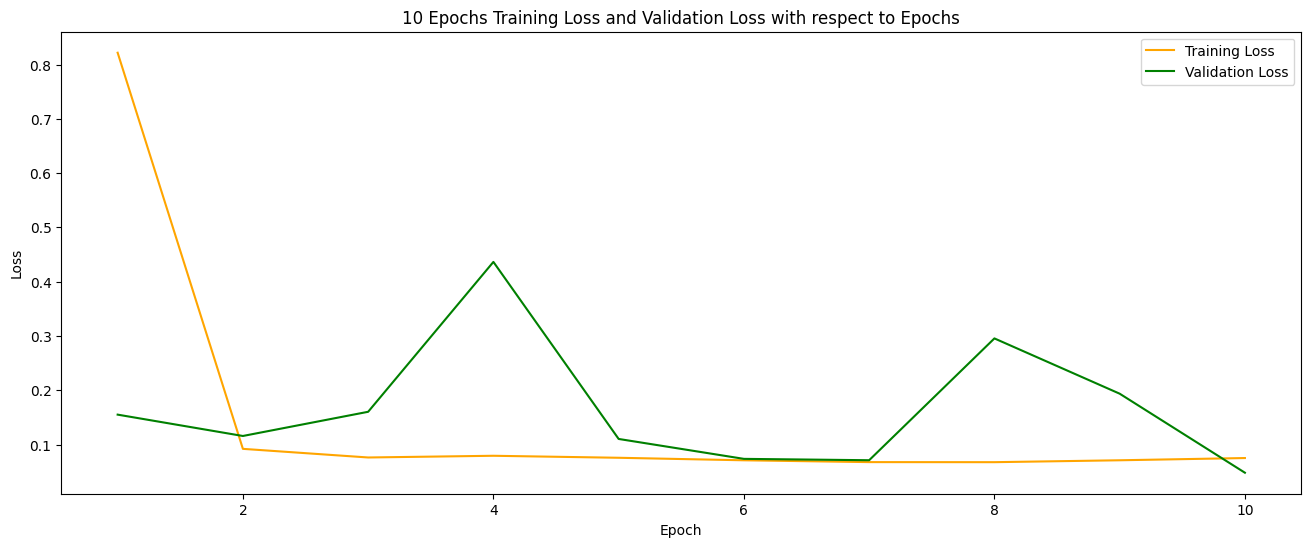

In [ ]:
#Traing vs Validation Loss

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Train Loss'], label='Training Loss',color = 'orange')
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Val Loss'], label='Validation Loss',color = 'green')
plt.title('10 Epochs Training Loss and Validation Loss with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

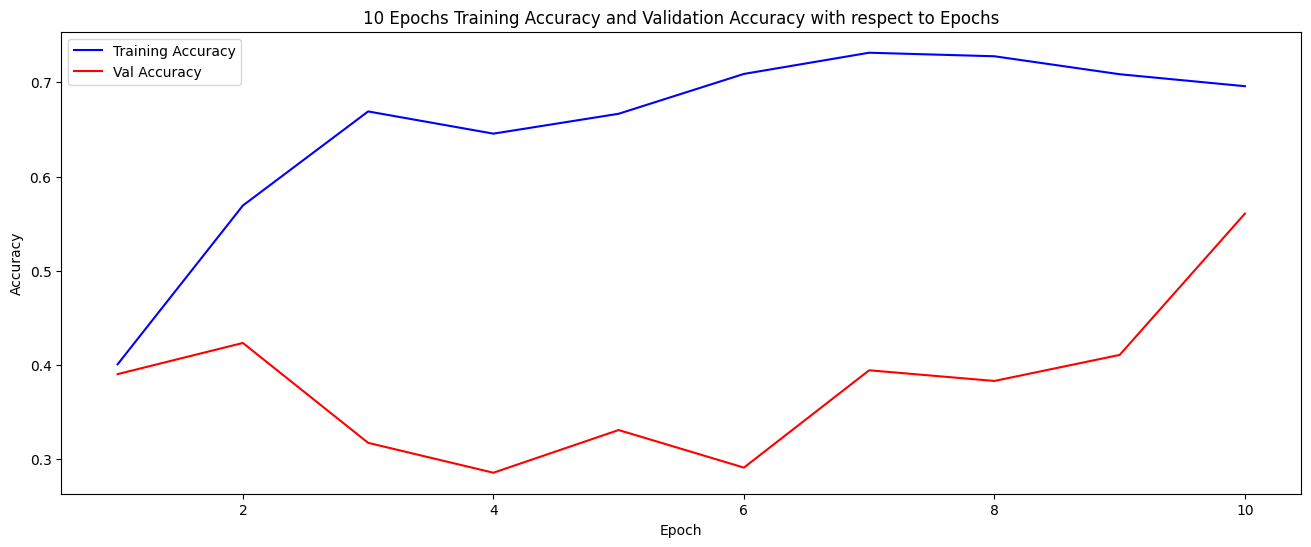

In [ ]:
#Training vs Validation Accuracy

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Training Accuracy'], label='Training Accuracy',color = 'blue')
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Val Accuracy'], label='Val Accuracy',color = 'red')
plt.title('10 Epochs Training Accuracy and Validation Accuracy with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

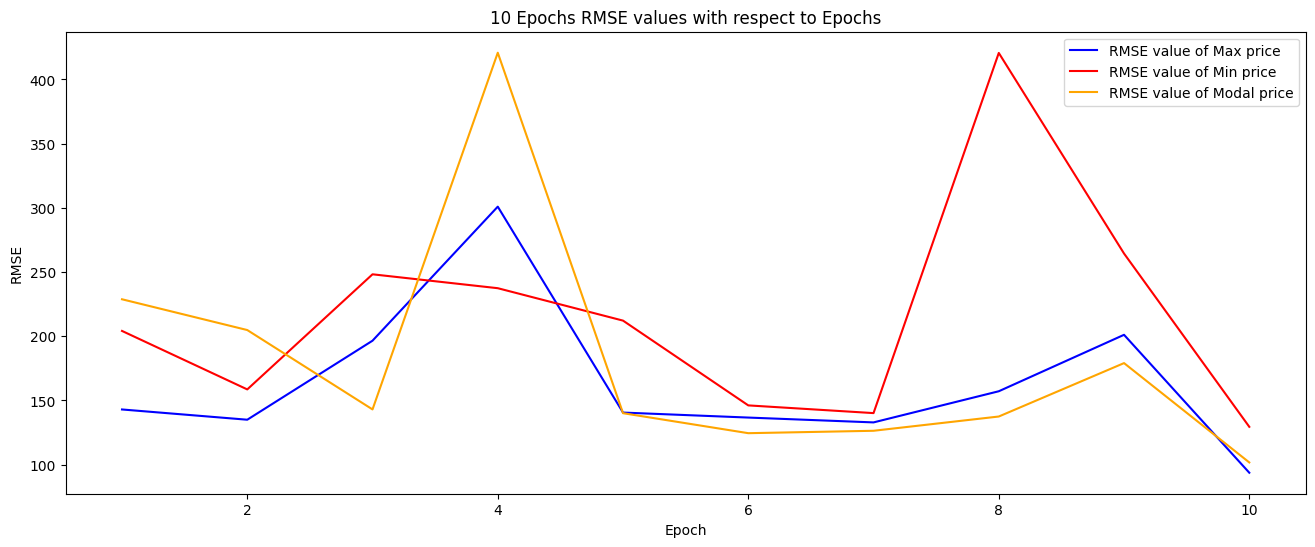

In [ ]:
#All RMSE values comparision

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Val RMSE (Max)'], label='RMSE value of Max price',color = 'blue')
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Val RMSE (Min)'], label='RMSE value of Min price',color = 'red')
plt.plot(matirces_data_10_epochs['Epoch'], matirces_data_10_epochs['Val RMSE (Modal)'], label='RMSE value of Modal price',color = 'orange')
plt.title('10 Epochs RMSE values with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

##**Epochs - 50**

In [ ]:
# import time
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# from sklearn.metrics import f1_score
# import numpy as np
# import warnings
# import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")

# # Assuming scalers for max, min, and modal data are defined as scaler_max, scaler_min, and scaler_modal respectively

# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# epochs = 50
# early_stop_count = 0
# best_loss = float('inf')

# def accuracy(outputs, targets, tolerance=0.1):
#     return (torch.abs(outputs - targets) < tolerance).float().mean()

# def binarize_outputs(outputs, targets, threshold=0.5):
#     return (outputs >= threshold).astype(int), (targets >= threshold).astype(int)

# # Start time
# start_time = time.time()

# for epoch in range(epochs):
#     model.train()
#     train_losses = []
#     train_accuracies = []
#     train_f1_scores = []

#     for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in train_loader:
#         x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
#         y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

#         optimizer.zero_grad()
#         outputs_max, outputs_min, outputs_modal = model(x_max_batch, x_min_batch, x_modal_batch)

#         loss = (criterion(outputs_max, y_max_batch) +
#                 criterion(outputs_min, y_min_batch) +
#                 criterion(outputs_modal, y_modal_batch))

#         loss.backward()
#         optimizer.step()

#         train_losses.append(loss.item())
#         train_accuracies.append(accuracy(outputs_max, y_max_batch).item())
#         train_accuracies.append(accuracy(outputs_min, y_min_batch).item())
#         train_accuracies.append(accuracy(outputs_modal, y_modal_batch).item())

#         y_batch_np = y_max_batch.cpu().detach().numpy()
#         outputs_np = outputs_max.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#         y_batch_np = y_min_batch.cpu().detach().numpy()
#         outputs_np = outputs_min.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#         y_batch_np = y_modal_batch.cpu().detach().numpy()
#         outputs_np = outputs_modal.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#     # Validation
#     model.eval()
#     val_losses = []
#     val_accuracies = []
#     val_f1_scores = []
#     predictions_max = []
#     predictions_min = []
#     predictions_modal = []
#     true_max = []
#     true_min = []
#     true_modal = []
#     rmse_max = []
#     rmse_min = []
#     rmse_modal = []

#     with torch.no_grad():
#         for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in test_loader:
#             x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
#             y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

#             outputs_max, outputs_min, outputs_modal = model(x_max_batch, x_min_batch, x_modal_batch)

#             loss = (criterion(outputs_max, y_max_batch) +
#                     criterion(outputs_min, y_min_batch) +
#                     criterion(outputs_modal, y_modal_batch))

#             val_losses.append(loss.item())
#             val_accuracies.append(accuracy(outputs_max, y_max_batch).item())
#             val_accuracies.append(accuracy(outputs_min, y_min_batch).item())
#             val_accuracies.append(accuracy(outputs_modal, y_modal_batch).item())

#             predictions_max.extend(outputs_max.cpu().detach().numpy().flatten())
#             predictions_min.extend(outputs_min.cpu().detach().numpy().flatten())
#             predictions_modal.extend(outputs_modal.cpu().detach().numpy().flatten())

#             true_max.extend(y_max_batch.cpu().detach().numpy().flatten())
#             true_min.extend(y_min_batch.cpu().detach().numpy().flatten())
#             true_modal.extend(y_modal_batch.cpu().detach().numpy().flatten())

#             y_batch_np = y_max_batch.cpu().detach().numpy()
#             outputs_np = outputs_max.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#             y_batch_np = y_min_batch.cpu().detach().numpy()
#             outputs_np = outputs_min.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#             y_batch_np = y_modal_batch.cpu().detach().numpy()
#             outputs_np = outputs_modal.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#     val_loss = np.mean(val_losses)
#     val_accuracy = np.mean(val_accuracies)
#     val_f1_score_mean = np.mean(val_f1_scores)

#     # Inverse transform the predictions and true values
#     predictions_max_np = scaler.inverse_transform(np.array(predictions_max).reshape(-1, 1))
#     predictions_min_np = scaler.inverse_transform(np.array(predictions_min).reshape(-1, 1))
#     predictions_modal_np = scaler.inverse_transform(np.array(predictions_modal).reshape(-1, 1))

#     true_max_np = scaler.inverse_transform(np.array(true_max).reshape(-1, 1))
#     true_min_np = scaler.inverse_transform(np.array(true_min).reshape(-1, 1))
#     true_modal_np = scaler.inverse_transform(np.array(true_modal).reshape(-1, 1))

#     val_rmse_max = np.sqrt(np.mean((predictions_max_np - true_max_np)**2))
#     val_rmse_min = np.sqrt(np.mean((predictions_min_np - true_min_np)**2))
#     val_rmse_modal = np.sqrt(np.mean((predictions_modal_np - true_modal_np)**2))

#     rmse_max.append(val_rmse_max)
#     rmse_min.append(val_rmse_min)
#     rmse_modal.append(val_rmse_modal)

#     scheduler.step(val_loss)

#     if val_loss < best_loss:
#         best_loss = val_loss
#         early_stop_count = 0
#     else:
#         early_stop_count += 1

#     print(f"""Epoch {epoch+1}/{epochs}
# -------------------------------Training-------------------------------------------
# Train Loss: {np.mean(train_losses)}, Train Accuracy: {np.mean(train_accuracies)}
# Train F1 Score: {np.mean(train_f1_scores)}
# -------------------------------Validation-------------------------------------------
# Val Loss: {val_loss}, Val Accuracy: {val_accuracy}
# Val RMSE (Max): {val_rmse_max:.4f}, Val RMSE (Min): {val_rmse_min:.4f}, Val RMSE (Modal): {val_rmse_modal:.4f}, Val F1 Score: {val_f1_score_mean}""")
#     print(80*'~')
#     print('\n')
# # End time
# end_time = time.time()
# total_training_time = end_time - start_time
# print(f'Total training time: {total_training_time:.2f} seconds')
# print(f'training complete for: {epochs}')
# print(80*"=")

# #  #   if early_stop_count >= 40:
# #  #      print("Early stopping")
# #  #     break

Epoch 1/50
-------------------------------Training-------------------------------------------
Train Loss: 0.8817305582463741, Train Accuracy: 0.4016666669845581
Train F1 Score: 0.9094252659154237
-------------------------------Validation-------------------------------------------
Val Loss: 0.25287683210943057, Val Accuracy: 0.29347826086956524
Val RMSE (Max): 187.2509, Val RMSE (Min): 365.0348, Val RMSE (Modal): 140.1788, Val F1 Score: 1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Epoch 2/50
-------------------------------Training-------------------------------------------
Train Loss: 0.09210241952538491, Train Accuracy: 0.5718571430047353
Train F1 Score: 0.9715214896156692
-------------------------------Validation-------------------------------------------
Val Loss: 0.1120623949834186, Val Accuracy: 0.4615036231884058
Val RMSE (Max): 133.6934, Val RMSE (Min): 130.5195, Val RMSE (Modal): 218.3508, Val F1 Score: 1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

###**Save the 50 Epochs model parameters**


In [ ]:
# Save the model to a file
# torch.save(model.state_dict(), "50_epochs_price_transformer_model.pt")

###**Visualize the 50 Epochs training matrices**

Save the all 50 Epoch training metrics into a **Excel Sheet**

Then import the Excel sheet

In [ ]:
file_path = 'OneDrive//Desktop//training_metrics_50_Epochs.xlsx'
matirces_data_50_epochs = pd.read_excel(file_path)
matirces_data_50_epochs.head()

,Epoch,Train Loss,Training Accuracy,Training F1 Score,Val Loss,Val Accuracy,Val RMSE (Max),Val RMSE (Min),Val RMSE (Modal),Val F1 Score
0,1,0.881731,0.401667,0.909425,0.252877,0.293478,187.2509,365.0348,140.1788,1.000000
1,2,0.092102,0.571857,0.971521,0.112062,0.461504,133.6934,130.5195,218.3508,1.000000
2,3,0.083628,0.621548,0.976053,0.117123,0.414402,159.3534,177.8855,185.5854,1.000000
3,4,0.078020,0.655190,0.976359,0.113323,0.324275,161.6239,117.5955,218.1624,1.000000
4,5,0.072334,0.706952,0.977175,0.429139,0.123188,293.8891,154.2578,460.9196,0.950965


In [ ]:
matirces_data_50_epochs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Epoch              50 non-null     int64  
 1   Train Loss         50 non-null     float64
 2   Training Accuracy  50 non-null     float64
 3   Training F1 Score  50 non-null     float64
 4   Val Loss           50 non-null     float64
 5   Val Accuracy       50 non-null     float64
 6   Val RMSE (Max)     50 non-null     float64
 7   Val RMSE (Min)     50 non-null     float64
 8   Val RMSE (Modal)   50 non-null     float64
 9   Val F1 Score       50 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 4.0 KB


####**Plot the 50 Epochs matrices data**

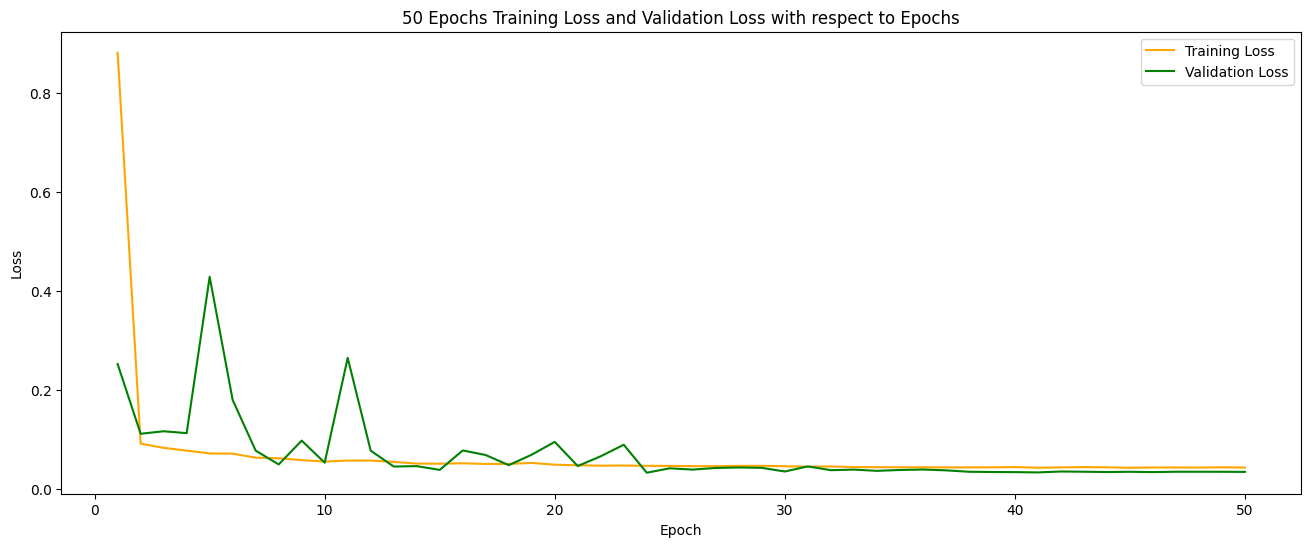

In [ ]:
#Traing Loss vs Validation Loss

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Train Loss'], label='Training Loss',color = 'orange')
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Val Loss'], label='Validation Loss',color = 'green')
plt.title('50 Epochs Training Loss and Validation Loss with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

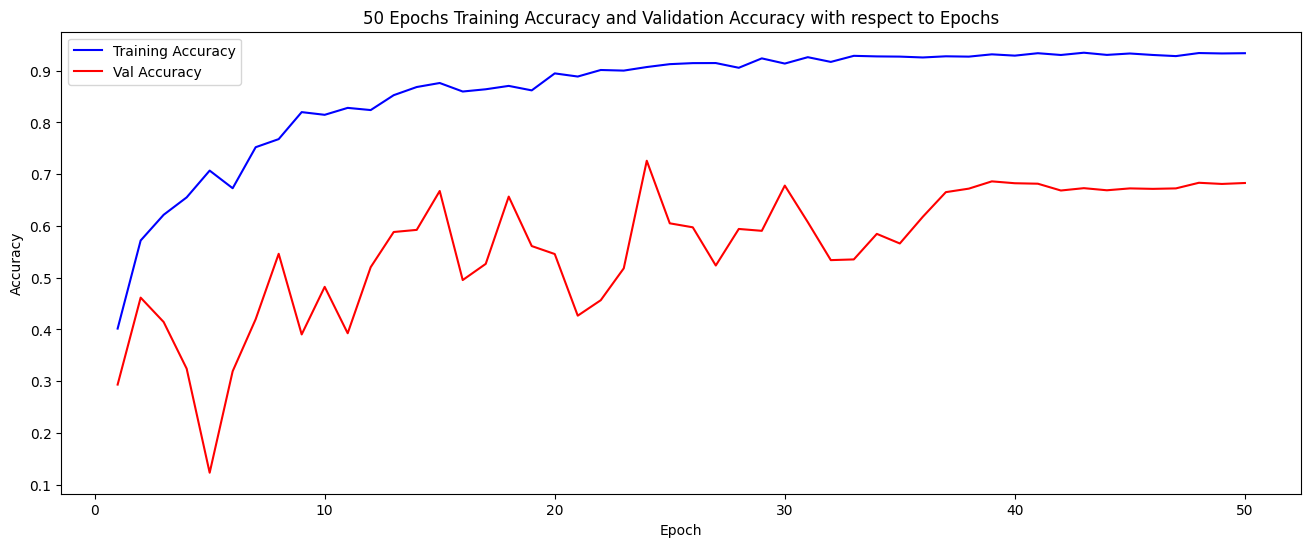

In [ ]:
#Traing Vs Validation Accuracy

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Training Accuracy'], label='Training Accuracy',color = 'blue')
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Val Accuracy'], label='Val Accuracy',color = 'red')
plt.title('50 Epochs Training Accuracy and Validation Accuracy with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

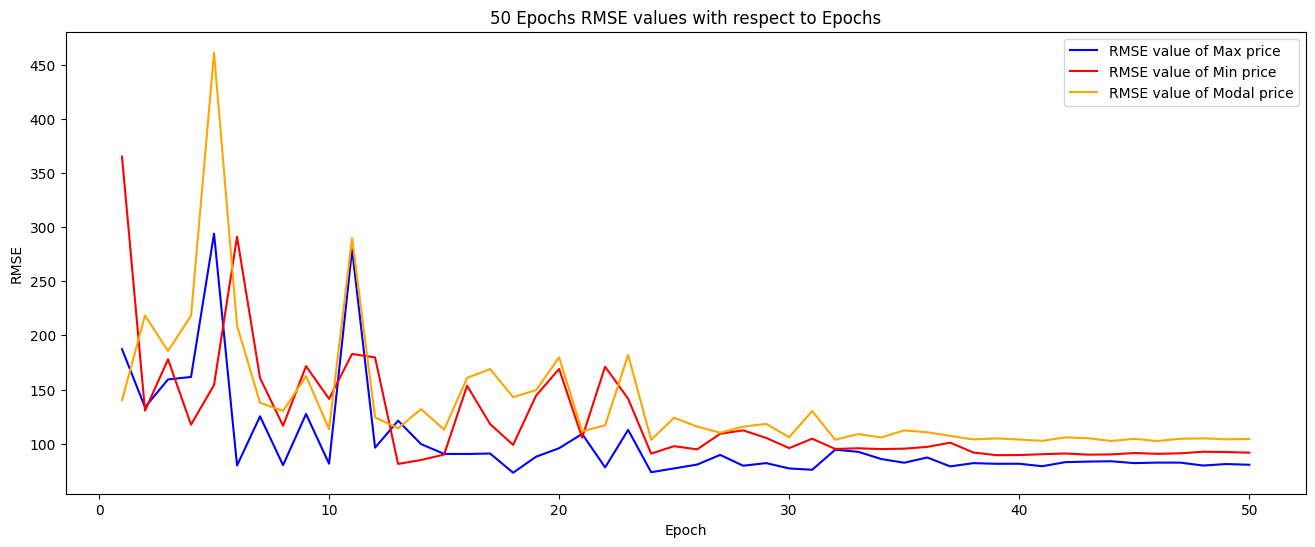

In [ ]:
#All RMSE values comparision

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Val RMSE (Max)'], label='RMSE value of Max price',color = 'blue')
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Val RMSE (Min)'], label='RMSE value of Min price',color = 'red')
plt.plot(matirces_data_50_epochs['Epoch'], matirces_data_50_epochs['Val RMSE (Modal)'], label='RMSE value of Modal price',color = 'orange')
plt.title('50 Epochs RMSE values with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

##**Epochs - 100**

In [ ]:
# import time
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# from sklearn.metrics import f1_score
# import numpy as np
# import warnings
# import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")

# # Assuming scalers for max, min, and modal data are defined as scaler_max, scaler_min, and scaler_modal respectively

# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# epochs = 100
# early_stop_count = 0
# best_loss = float('inf')

# def accuracy(outputs, targets, tolerance=0.1):
#     return (torch.abs(outputs - targets) < tolerance).float().mean()

# def binarize_outputs(outputs, targets, threshold=0.5):
#     return (outputs >= threshold).astype(int), (targets >= threshold).astype(int)

# # Start time
# start_time = time.time()

# for epoch in range(epochs):
#     model.train()
#     train_losses = []
#     train_accuracies = []
#     train_f1_scores = []

#     for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in train_loader:
#         x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
#         y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

#         optimizer.zero_grad()
#         outputs_max, outputs_min, outputs_modal = model(x_max_batch, x_min_batch, x_modal_batch)

#         loss = (criterion(outputs_max, y_max_batch) +
#                 criterion(outputs_min, y_min_batch) +
#                 criterion(outputs_modal, y_modal_batch))

#         loss.backward()
#         optimizer.step()

#         train_losses.append(loss.item())
#         train_accuracies.append(accuracy(outputs_max, y_max_batch).item())
#         train_accuracies.append(accuracy(outputs_min, y_min_batch).item())
#         train_accuracies.append(accuracy(outputs_modal, y_modal_batch).item())

#         y_batch_np = y_max_batch.cpu().detach().numpy()
#         outputs_np = outputs_max.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#         y_batch_np = y_min_batch.cpu().detach().numpy()
#         outputs_np = outputs_min.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#         y_batch_np = y_modal_batch.cpu().detach().numpy()
#         outputs_np = outputs_modal.cpu().detach().numpy()
#         outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#         train_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#     # Validation
#     model.eval()
#     val_losses = []
#     val_accuracies = []
#     val_f1_scores = []
#     predictions_max = []
#     predictions_min = []
#     predictions_modal = []
#     true_max = []
#     true_min = []
#     true_modal = []
#     rmse_max = []
#     rmse_min = []
#     rmse_modal = []

#     with torch.no_grad():
#         for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in test_loader:
#             x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
#             y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

#             outputs_max, outputs_min, outputs_modal = model(x_max_batch, x_min_batch, x_modal_batch)

#             loss = (criterion(outputs_max, y_max_batch) +
#                     criterion(outputs_min, y_min_batch) +
#                     criterion(outputs_modal, y_modal_batch))

#             val_losses.append(loss.item())
#             val_accuracies.append(accuracy(outputs_max, y_max_batch).item())
#             val_accuracies.append(accuracy(outputs_min, y_min_batch).item())
#             val_accuracies.append(accuracy(outputs_modal, y_modal_batch).item())

#             predictions_max.extend(outputs_max.cpu().detach().numpy().flatten())
#             predictions_min.extend(outputs_min.cpu().detach().numpy().flatten())
#             predictions_modal.extend(outputs_modal.cpu().detach().numpy().flatten())

#             true_max.extend(y_max_batch.cpu().detach().numpy().flatten())
#             true_min.extend(y_min_batch.cpu().detach().numpy().flatten())
#             true_modal.extend(y_modal_batch.cpu().detach().numpy().flatten())

#             y_batch_np = y_max_batch.cpu().detach().numpy()
#             outputs_np = outputs_max.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#             y_batch_np = y_min_batch.cpu().detach().numpy()
#             outputs_np = outputs_min.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#             y_batch_np = y_modal_batch.cpu().detach().numpy()
#             outputs_np = outputs_modal.cpu().detach().numpy()
#             outputs_bin, y_batch_bin = binarize_outputs(outputs_np, y_batch_np)
#             val_f1_scores.append(f1_score(y_batch_bin, outputs_bin, average='macro'))

#     val_loss = np.mean(val_losses)
#     val_accuracy = np.mean(val_accuracies)
#     val_f1_score_mean = np.mean(val_f1_scores)

#     # Inverse transform the predictions and true values
#     predictions_max_np = scaler.inverse_transform(np.array(predictions_max).reshape(-1, 1))
#     predictions_min_np = scaler.inverse_transform(np.array(predictions_min).reshape(-1, 1))
#     predictions_modal_np = scaler.inverse_transform(np.array(predictions_modal).reshape(-1, 1))

#     true_max_np = scaler.inverse_transform(np.array(true_max).reshape(-1, 1))
#     true_min_np = scaler.inverse_transform(np.array(true_min).reshape(-1, 1))
#     true_modal_np = scaler.inverse_transform(np.array(true_modal).reshape(-1, 1))

#     val_rmse_max = np.sqrt(np.mean((predictions_max_np - true_max_np)**2))
#     val_rmse_min = np.sqrt(np.mean((predictions_min_np - true_min_np)**2))
#     val_rmse_modal = np.sqrt(np.mean((predictions_modal_np - true_modal_np)**2))

#     rmse_max.append(val_rmse_max)
#     rmse_min.append(val_rmse_min)
#     rmse_modal.append(val_rmse_modal)

#     scheduler.step(val_loss)

#     if val_loss < best_loss:
#         best_loss = val_loss
#         early_stop_count = 0
#     else:
#         early_stop_count += 1

#     print(f"""Epoch {epoch+1}/{epochs}
# -------------------------------Training-------------------------------------------
# Train Loss: {np.mean(train_losses)}, Train Accuracy: {np.mean(train_accuracies)}
# Train F1 Score: {np.mean(train_f1_scores)}
# -------------------------------Validation-------------------------------------------
# Val Loss: {val_loss}, Val Accuracy: {val_accuracy}
# Val RMSE (Max): {val_rmse_max:.4f}, Val RMSE (Min): {val_rmse_min:.4f}, Val RMSE (Modal): {val_rmse_modal:.4f}, Val F1 Score: {val_f1_score_mean}""")
#     print(80*'~')
#     print('\n')
# # End time
# end_time = time.time()
# total_training_time = end_time - start_time
# print(f'Total training time: {total_training_time:.2f} seconds')
# print(f'training complete for: {epochs}')
# print(80*"=")

# #  #   if early_stop_count >= 40:
# #  #      print("Early stopping")
# #  #     break

Epoch 1/100
-------------------------------Training-------------------------------------------
Train Loss: 0.2522500240281224, Train Accuracy: 0.5038809524774551
Train F1 Score: 0.9472322431075947
-------------------------------Validation-------------------------------------------
Val Loss: 0.31743209517520404, Val Accuracy: 0.3532608695652174
Val RMSE (Max): 157.8072, Val RMSE (Min): 450.3740, Val RMSE (Modal): 107.3714, Val F1 Score: 0.9844012420019498
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Epoch 2/100
-------------------------------Training-------------------------------------------
Train Loss: 0.0855382237881422, Train Accuracy: 0.6179642858505249
Train F1 Score: 0.9744774472336597
-------------------------------Validation-------------------------------------------
Val Loss: 0.09034944455260815, Val Accuracy: 0.36186594202898553
Val RMSE (Max): 186.9313, Val RMSE (Min): 133.6020, Val RMSE (Modal): 131.8032, Val F1 Score: 1.0
~~~~~~~~~~~~~

### **Save the 100 Epochs model parameters**

In [ ]:
# Save the model to a file
# torch.save(model.state_dict(), "100_epochs_price_transformer_model.pt")

###**Vizualize the 100 Epochs training matrices**

Save the all 100 Epochs training metrics in a **Excel Sheet**

Then import the Excel sheet

In [ ]:
file_path = 'OneDrive//Desktop//training_metrics_100_epochs.xlsx'
matirces_data_100_epochs = pd.read_excel(file_path)
matirces_data_100_epochs.head()

,Epoch,Train Loss,Training Accuracy,Training F1 Score,Val Loss,Val Accuracy,Val RMSE (Max),Val RMSE (Min),Val RMSE (Modal),Val F1 Score
0,1,0.252250,0.503881,0.947232,0.317432,0.353261,157.8072,450.3740,107.3714,0.984401
1,2,0.085538,0.617964,0.974477,0.090349,0.361866,186.9313,133.6020,131.8032,1.000000
2,3,0.075793,0.687643,0.977472,0.059319,0.388587,106.8932,117.1282,139.1893,1.000000
3,4,0.072199,0.710298,0.979089,0.138134,0.490036,90.5276,269.1379,144.9099,1.000000
4,5,0.078401,0.660512,0.979237,0.092168,0.379076,175.1613,149.3594,130.5962,1.000000


In [ ]:
matirces_data_100_epochs.tail()

,Epoch,Train Loss,Training Accuracy,Training F1 Score,Val Loss,Val Accuracy,Val RMSE (Max),Val RMSE (Min),Val RMSE (Modal),Val F1 Score
95,96,0.043796,0.932155,0.985290,0.024247,0.785326,77.0146,70.6062,86.6349,1.0
96,97,0.042874,0.931238,0.984974,0.024238,0.785326,77.0019,70.6034,86.6103,1.0
97,98,0.043813,0.934571,0.983745,0.024235,0.785326,77.0015,70.6047,86.5964,1.0
98,99,0.043659,0.934000,0.984976,0.024235,0.785326,77.0111,70.6035,86.5873,1.0
99,100,0.043264,0.933750,0.984971,0.024227,0.785326,76.9927,70.5996,86.5705,1.0


In [ ]:
matirces_data_100_epochs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Epoch              100 non-null    int64  
 1   Train Loss         100 non-null    float64
 2   Training Accuracy  100 non-null    float64
 3   Training F1 Score  100 non-null    float64
 4   Val Loss           100 non-null    float64
 5   Val Accuracy       100 non-null    float64
 6   Val RMSE (Max)     100 non-null    float64
 7   Val RMSE (Min)     100 non-null    float64
 8   Val RMSE (Modal)   100 non-null    float64
 9   Val F1 Score       100 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


####**Plot the 100 Epochs matrices data**

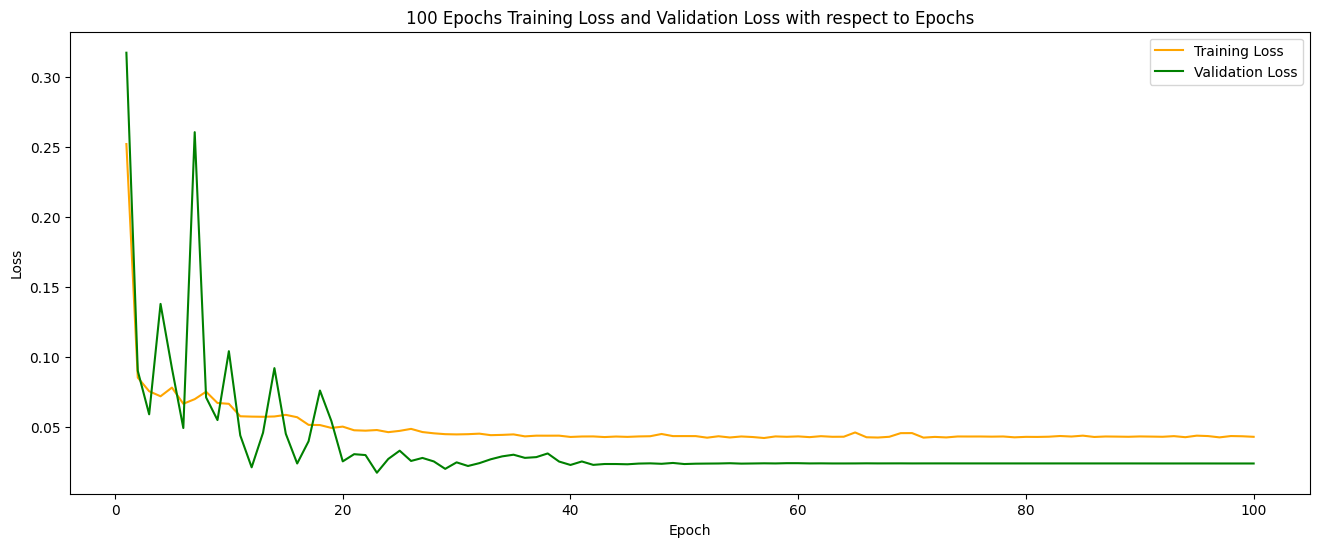

In [ ]:
#Training Loss vs Validation Loss

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Train Loss'], label='Training Loss',color = 'orange')
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Val Loss'], label='Validation Loss',color = 'green')
plt.title('100 Epochs Training Loss and Validation Loss with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

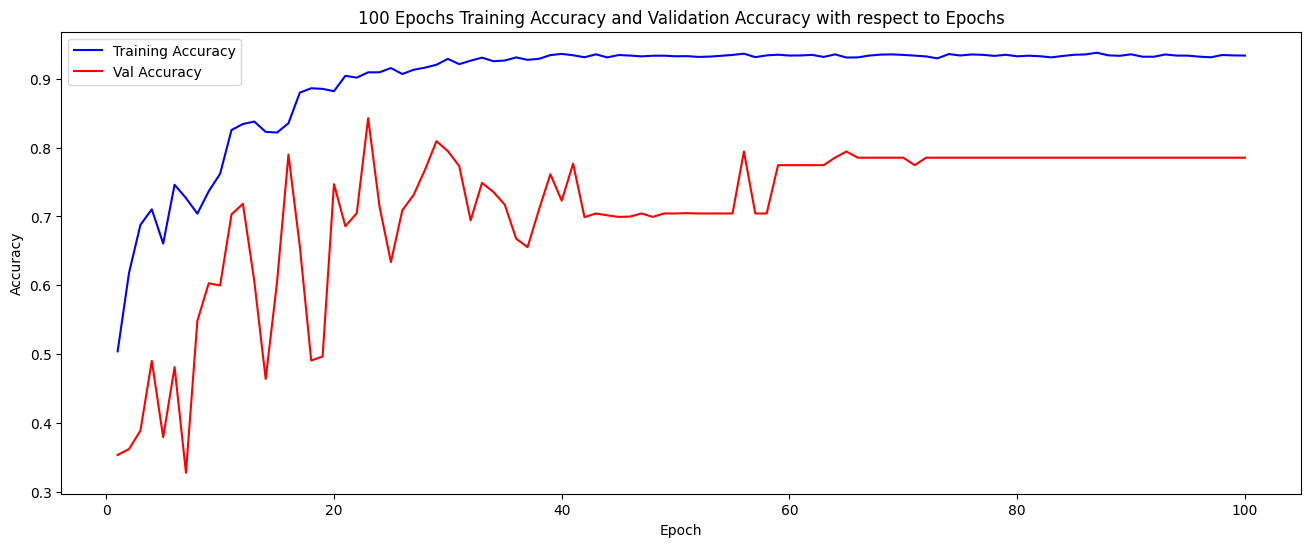

In [ ]:
#Training Vs Validation Accuracy

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Training Accuracy'], label='Training Accuracy',color = 'blue')
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Val Accuracy'], label='Val Accuracy',color = 'red')
plt.title('100 Epochs Training Accuracy and Validation Accuracy with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

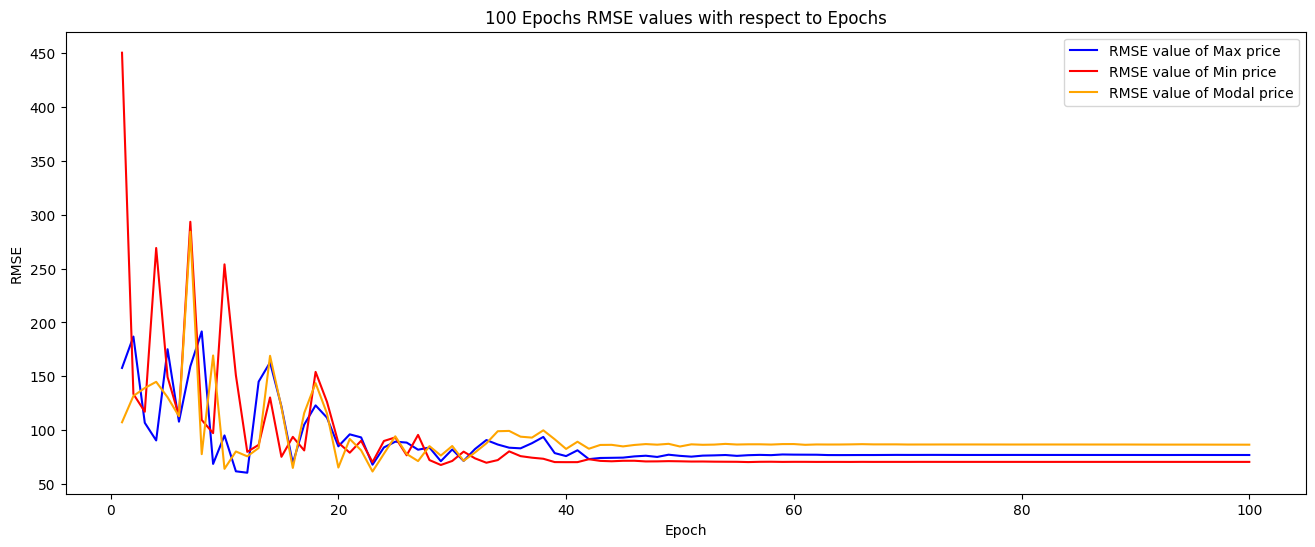

In [ ]:
#Compare all the RMSE values

plt.figure(figsize=(16, 6))
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Val RMSE (Max)'], label='RMSE value of Max price',color = 'blue')
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Val RMSE (Min)'], label='RMSE value of Min price',color = 'red')
plt.plot(matirces_data_100_epochs['Epoch'], matirces_data_100_epochs['Val RMSE (Modal)'], label='RMSE value of Modal price',color = 'orange')
plt.title('100 Epochs RMSE values with respect to Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#**Evaluation**


**1: Load diffrent Model State 🔄:**
- Next, we will load the saved model state. This ensures that the model is in the same state as when it was saved, ready for evaluation.

**2: Prepare Data for Evaluation 📈:**
- We will send the `min price`, `max price`, and `modal price` data to the model for predictions. The model will generate outputs based on this input data.

**3: Create a DataFrame 📋:**
- To systematically compare the predicted prices with the actual prices, we will create a DataFrame. This will contain both the predicted price data and the actual price data.

**4: Visualize the Results 📊:**
- Finally, we will plot each type of price data (min, max, and modal) alongside the actual data. This will help us visually assess the performance of our model.


### **Load the Diffrent models**

*100 Epochs model*

In [ ]:
model_100_epochs = MultiInputMultiOutputTransformer(input_dim=1, model_dim=128, num_heads=8, num_layers=3, output_dim=1).to('cuda')
model_100_epochs.load_state_dict(torch.load("100_epochs_price_transformer_model.pt"))
# print("The 100 Epochs model Summary")
# print(80*'-')
# model_100_epochs.eval()


The 100 Epochs model Summary
--------------------------------------------------------------------------------


MultiInputMultiOutputTransformer(
  (embedding_max): Linear(in_features=1, out_features=128, bias=True)
  (embedding_min): Linear(in_features=1, out_features=128, bias=True)
  (embedding_modal): Linear(in_features=1, out_features=128, bias=True)
  (encoder_max): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (encoder_min): TransformerEncoder(
    (l

*50 Epochs model*

In [ ]:
model_50_epochs = MultiInputMultiOutputTransformer(input_dim=1, model_dim=128, num_heads=8, num_layers=3, output_dim=1).to('cuda')
model_50_epochs.load_state_dict(torch.load("50_epochs_price_transformer_model.pt"))
# print("The 50 Epochs model Summary")
# print(80*'-')
# moel_100_epochs.eval()


The 50 Epochs model Summary
--------------------------------------------------------------------------------


MultiInputMultiOutputTransformer(
  (embedding_max): Linear(in_features=1, out_features=128, bias=True)
  (embedding_min): Linear(in_features=1, out_features=128, bias=True)
  (embedding_modal): Linear(in_features=1, out_features=128, bias=True)
  (encoder_max): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (encoder_min): TransformerEncoder(
    (l

*10 Epochs model*

In [ ]:
model_10_epochs = MultiInputMultiOutputTransformer(input_dim=1, model_dim=128, num_heads=8, num_layers=3, output_dim=1).to('cuda')
model_10_epochs.load_state_dict(torch.load("10_epochs_price_transformer_model.pt"))
# print("The 10 Epochs model Summary")
# print(80*'-')
# model_10_epochs.eval()

The 10 Epochs model Summary
--------------------------------------------------------------------------------


MultiInputMultiOutputTransformer(
  (embedding_max): Linear(in_features=1, out_features=128, bias=True)
  (embedding_min): Linear(in_features=1, out_features=128, bias=True)
  (embedding_modal): Linear(in_features=1, out_features=128, bias=True)
  (encoder_max): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (encoder_min): TransformerEncoder(
    (l

In [ ]:
# modal_data_y_inverse = scaler.inverse_transform(modal_data_y.cpu().detach().numpy().reshape(-1, 1))

In [ ]:
# modal_data_y_inverse

array([[1300.0001],
       [1300.0001],
       [1300.0001],
       ...,
       [4500.    ],
       [4500.    ],
       [4500.    ]], dtype=float32)

In [ ]:
# data['Modal Price (Rs./Quintal)']

0       1350
1       1350
2       1300
3       1300
4       1300
        ... 
5420    4400
5421    4400
5422    4500
5423    4500
5424    4500
Name: Modal Price (Rs./Quintal), Length: 5425, dtype: int64

## **Prepare the Dataset for Model Evaluation**

First, separate the max, min, and modal price columns from the original DataFrame. Then, perform standard scaling on these columns using `StandardScaler` to scale the input for the model. Finally, convert the scaled data into a PyTorch DataLoader for efficient model evaluation.



In [ ]:
max_data = data['Max Price (Rs./Quintal)']
min_data = data['Min Price (Rs./Quintal)']
modal_data = data['Modal Price (Rs./Quintal)']


# reshape the max,min,modal price data
max_data = max_data.to_numpy().reshape(-1, 1)
min_data = min_data.to_numpy().reshape(-1, 1)
modal_data = modal_data.to_numpy().reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Apply the scaler to the max,min,modal price data
max_data = scaler.fit_transform(max_data).flatten().tolist()
min_data = scaler.fit_transform(min_data).flatten().tolist()
modal_data = scaler.fit_transform(modal_data).flatten().tolist()\


#make data list data into sequence of input and output

SEQUENCE_LENGTH = 365
def sequence(seq_len, data):
  x =[]
  y =[]
  for i in range(len(data)-seq_len):
    window = data[i:i+seq_len]
    after_window = data[i+seq_len]
    x.append(window)
    y.append(after_window)
  return torch.tensor(x, dtype = torch.float32).view(-1, seq_len, 1), torch.tensor(y, dtype = torch.float32).view(-1, 1)

#X and Y split for train and test

#max,min,modal price data
max_data_x , max_data_y = sequence(SEQUENCE_LENGTH, max_data)
min_data_x , min_data_y = sequence(SEQUENCE_LENGTH, min_data)
modal_data_x , modal_data_y = sequence(SEQUENCE_LENGTH, modal_data)

#Setup data loaders for batch

#Max data-->
max_dataset = TensorDataset(max_data_x, max_data_y)
max_loader = DataLoader(max_dataset, batch_size=32, shuffle=False)

#Min data -->
min_dataset = TensorDataset(min_data_x, min_data_y)
min_loader = DataLoader(min_dataset, batch_size=32, shuffle=False)

#Modal data -->
modal_dataset = TensorDataset(modal_data_x, modal_data_y)
modal_loader = DataLoader(modal_dataset, batch_size=32, shuffle=False)


# Create combined datasets
data_dataset = CombinedDataset(max_dataset, min_dataset, modal_dataset)

# Create data loaders
data_loader = DataLoader(data_dataset, batch_size=32, shuffle=False)


## **Generate Output**

Now, send the data_loader to the diffrent models to generate the predicted values. Then, create diffrent DataFrames that contain both the predicted price values and the actual price values for all 3 types of models.

###**For 100 Epochs Model**

After Generate the output create a `dataframe` which contains all the predicted output and actual output

In [ ]:
import numpy as np
import pandas as pd
import torch

# Ensure the model is in evaluation mode
model_100_epochs.eval()

# To store the results
predictions = []

# Function to get predictions
def get_predictions(loader, predictions):
    with torch.no_grad():
        for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in loader:
            x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
            y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

            outputs_max, outputs_min, outputs_modal = model_100_epochs(x_max_batch, x_min_batch, x_modal_batch)

            predictions.append((outputs_max.cpu().numpy(), outputs_min.cpu().numpy(), outputs_modal.cpu().numpy()))
            # actuals.append((y_max_batch.cpu().numpy(), y_min_batch.cpu().numpy(), y_modal_batch.cpu().numpy()))

# Get predictions for the training data
get_predictions(data_loader, predictions)

# Flatten lists of arrays to single arrays
predictions_max = np.concatenate([pred[0] for pred in predictions]).flatten()
predictions_min = np.concatenate([pred[1] for pred in predictions]).flatten()
predictions_modal = np.concatenate([pred[2] for pred in predictions]).flatten()


# Ensure all arrays are 1-dimensional
print("The Dimentions of the Predicted values ")
print(predictions_max.shape)
print(predictions_min.shape)
print(predictions_modal.shape)

# Scaler inverse transformation
predictions_max = scaler.inverse_transform(predictions_max.reshape(-1, 1)).flatten()
predictions_min = scaler.inverse_transform(predictions_min.reshape(-1, 1)).flatten()
predictions_modal = scaler.inverse_transform(predictions_modal.reshape(-1, 1)).flatten()

# Create DataFrame for predictions and actuals
prediction_100_epochs_df = pd.DataFrame({
    'Predicted_Max': predictions_max,
    'Actual_Max': data['Max Price (Rs./Quintal)'][365:],
    'Predicted_Min': predictions_min,
    'Actual_Min': data['Min Price (Rs./Quintal)'][365:],
    'Predicted_Modal': predictions_modal,
    'Actual_Modal': data['Modal Price (Rs./Quintal)'][365:]
})

# Save the DataFrame to a CSV file
prediction_100_epochs_df.to_csv('predictions_100_epochs.csv', index=False)

# Display the DataFrame
print(prediction_100_epochs_df.head())

The Dimentions of the Predicted values 
(5060,)
(5060,)
(5060,)
     Predicted_Max  Actual_Max  Predicted_Min  Actual_Min  Predicted_Modal  \
365    1355.803345        1310    1292.261963        1290      1320.981445   
366    1355.803345        1310    1292.261963        1290      1320.981445   
367    1355.803345        1310    1292.261963        1290      1320.981445   
368    1355.803345        1310    1292.261963        1290      1320.981445   
369    1355.803345        1310    1292.261963        1290      1320.981445   

     Actual_Modal  
365          1300  
366          1300  
367          1300  
368          1300  
369          1300  


In [ ]:
prediction_100_epochs_df.head()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
365,1355.803345,1310,1292.261963,1290,1320.981445,1300
366,1355.803345,1310,1292.261963,1290,1320.981445,1300
367,1355.803345,1310,1292.261963,1290,1320.981445,1300
368,1355.803345,1310,1292.261963,1290,1320.981445,1300
369,1355.803345,1310,1292.261963,1290,1320.981445,1300


In [ ]:
#from float to convert the all train_df into int data_type

prediction_100_epochs_df = prediction_100_epochs_df.astype(int)


In [ ]:
prediction_100_epochs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 365 to 5424
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Predicted_Max    5060 non-null   int32
 1   Actual_Max       5060 non-null   int32
 2   Predicted_Min    5060 non-null   int32
 3   Actual_Min       5060 non-null   int32
 4   Predicted_Modal  5060 non-null   int32
 5   Actual_Modal     5060 non-null   int32
dtypes: int32(6)
memory usage: 118.7 KB


In [ ]:
prediction_100_epochs_df.shape

(5060, 6)

In [ ]:
prediction_100_epochs_df.head()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
365,1355,1310,1292,1290,1320,1300
366,1355,1310,1292,1290,1320,1300
367,1355,1310,1292,1290,1320,1300
368,1355,1310,1292,1290,1320,1300
369,1355,1310,1292,1290,1320,1300


In [ ]:
prediction_100_epochs_df.tail()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
5420,4630,4500,4558,4300,4672,4400
5421,4474,4500,4446,4300,4524,4400
5422,4474,4600,4446,4400,4524,4500
5423,4629,4600,4556,4400,4671,4500
5424,4629,4600,4556,4400,4671,4500


####**Actual vs Predicted plot For 100 Epochs**

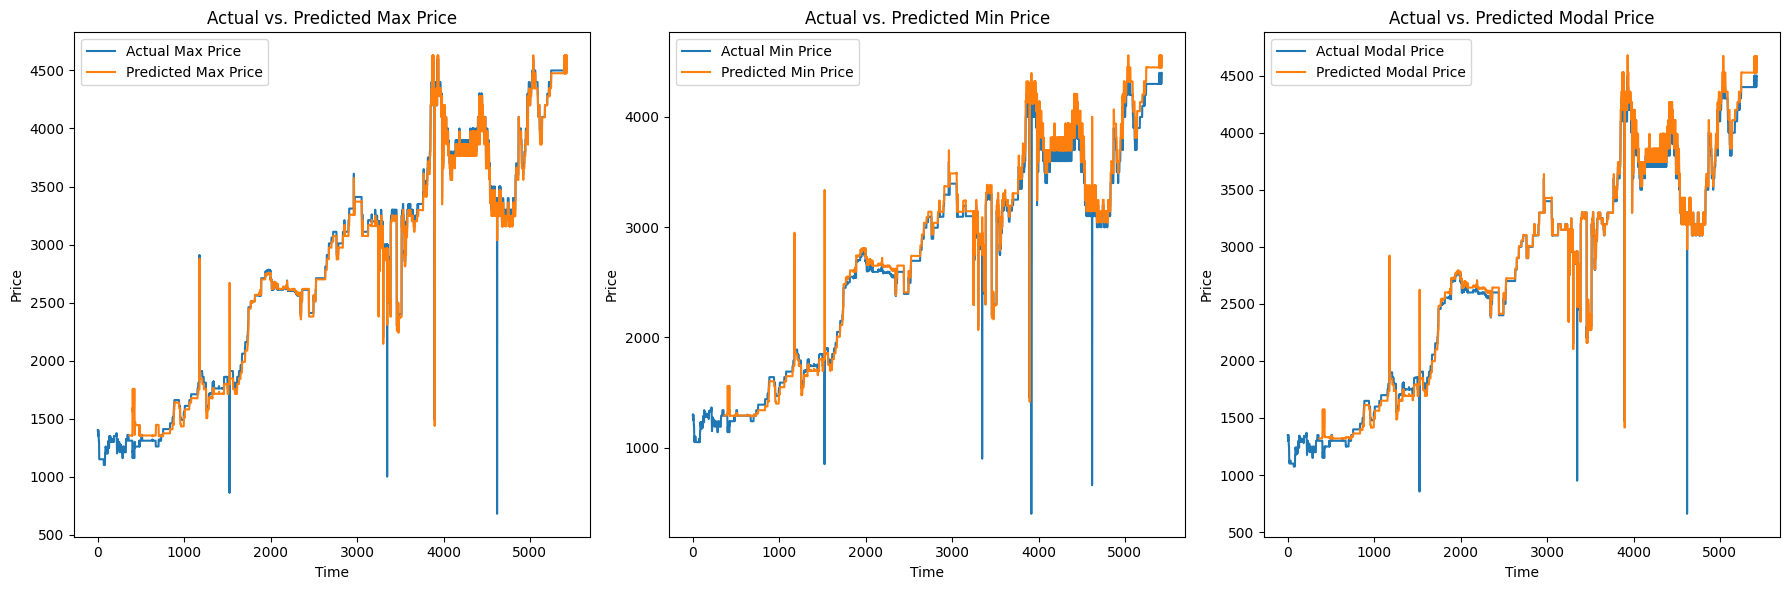

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Actual vs. Predicted Max Price
sns.lineplot(ax=axes[0], x=data.index, y=data['Max Price (Rs./Quintal)'], label='Actual Max Price')
sns.lineplot(ax=axes[0], x=prediction_100_epochs_df.index, y=prediction_100_epochs_df['Predicted_Max'], label='Predicted Max Price')
axes[0].set_title('Actual vs. Predicted Max Price')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot Actual vs. Predicted Min Price
sns.lineplot(ax=axes[1], x=data.index, y=data['Min Price (Rs./Quintal)'], label='Actual Min Price')
sns.lineplot(ax=axes[1], x=prediction_100_epochs_df.index, y=prediction_100_epochs_df['Predicted_Min'], label='Predicted Min Price')
axes[1].set_title('Actual vs. Predicted Min Price')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Price')
axes[1].legend()

# Plot Actual vs. Predicted Modal Price
sns.lineplot(ax=axes[2], x=data.index, y=data['Modal Price (Rs./Quintal)'], label='Actual Modal Price')
sns.lineplot(ax=axes[2], x=prediction_100_epochs_df.index, y=prediction_100_epochs_df['Predicted_Modal'], label='Predicted Modal Price')
axes[2].set_title('Actual vs. Predicted Modal Price')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Price')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


###**For 50 Epochs Model**

After Generate the output create a `dataframe` which contains all the predicted output and actual output

In [ ]:
import numpy as np
import pandas as pd
import torch

# Ensure the model is in evaluation mode
model_50_epochs.eval()

# To store the results
predictions = []

# Function to get predictions
def get_predictions(loader, predictions):
    with torch.no_grad():
        for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in loader:
            x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
            y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

            outputs_max, outputs_min, outputs_modal = model_50_epochs(x_max_batch, x_min_batch, x_modal_batch)

            predictions.append((outputs_max.cpu().numpy(), outputs_min.cpu().numpy(), outputs_modal.cpu().numpy()))
            # actuals.append((y_max_batch.cpu().numpy(), y_min_batch.cpu().numpy(), y_modal_batch.cpu().numpy()))

# Get predictions for the training data
get_predictions(data_loader, predictions)

# Flatten lists of arrays to single arrays
predictions_max = np.concatenate([pred[0] for pred in predictions]).flatten()
predictions_min = np.concatenate([pred[1] for pred in predictions]).flatten()
predictions_modal = np.concatenate([pred[2] for pred in predictions]).flatten()


# Ensure all arrays are 1-dimensional
print("The Dimentions of the Predicted values ")
print(predictions_max.shape)
print(predictions_min.shape)
print(predictions_modal.shape)

# Scaler inverse transformation
predictions_max = scaler.inverse_transform(predictions_max.reshape(-1, 1)).flatten()
predictions_min = scaler.inverse_transform(predictions_min.reshape(-1, 1)).flatten()
predictions_modal = scaler.inverse_transform(predictions_modal.reshape(-1, 1)).flatten()

# Create DataFrame for predictions and actuals
prediction_50_epochs_df = pd.DataFrame({
    'Predicted_Max': predictions_max,
    'Actual_Max': data['Max Price (Rs./Quintal)'][365:],
    'Predicted_Min': predictions_min,
    'Actual_Min': data['Min Price (Rs./Quintal)'][365:],
    'Predicted_Modal': predictions_modal,
    'Actual_Modal': data['Modal Price (Rs./Quintal)'][365:]
})

# Save the DataFrame to a CSV file
prediction_50_epochs_df.to_csv('predictions_50_epochs.csv', index=False)

# Display the DataFrame
print(prediction_50_epochs_df.head())

The Dimentions of the Predicted values 
(5060,)
(5060,)
(5060,)
     Predicted_Max  Actual_Max  Predicted_Min  Actual_Min  Predicted_Modal  \
365    1410.661499        1310    1418.206787        1290      1431.879395   
366    1410.661499        1310    1418.206787        1290      1431.879395   
367    1410.661499        1310    1418.206787        1290      1431.879395   
368    1410.661499        1310    1418.206787        1290      1431.879395   
369    1410.661499        1310    1418.206787        1290      1431.879395   

     Actual_Modal  
365          1300  
366          1300  
367          1300  
368          1300  
369          1300  


In [ ]:
prediction_50_epochs_df.head()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
365,1410.661499,1310,1418.206787,1290,1431.879395,1300
366,1410.661499,1310,1418.206787,1290,1431.879395,1300
367,1410.661499,1310,1418.206787,1290,1431.879395,1300
368,1410.661499,1310,1418.206787,1290,1431.879395,1300
369,1410.661499,1310,1418.206787,1290,1431.879395,1300


In [ ]:
#Convert all data type float to int
prediction_50_epochs_df = prediction_50_epochs_df.astype(int)

In [ ]:
prediction_50_epochs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 365 to 5424
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Predicted_Max    5060 non-null   int32
 1   Actual_Max       5060 non-null   int32
 2   Predicted_Min    5060 non-null   int32
 3   Actual_Min       5060 non-null   int32
 4   Predicted_Modal  5060 non-null   int32
 5   Actual_Modal     5060 non-null   int32
dtypes: int32(6)
memory usage: 118.7 KB


In [ ]:
prediction_50_epochs_df.tail()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
5420,4637,4500,4564,4300,4573,4400
5421,4513,4500,4457,4300,4475,4400
5422,4513,4600,4457,4400,4475,4500
5423,4638,4600,4562,4400,4574,4500
5424,4638,4600,4562,4400,4574,4500


####**Actual vs predicted plot for 50 Epochs**

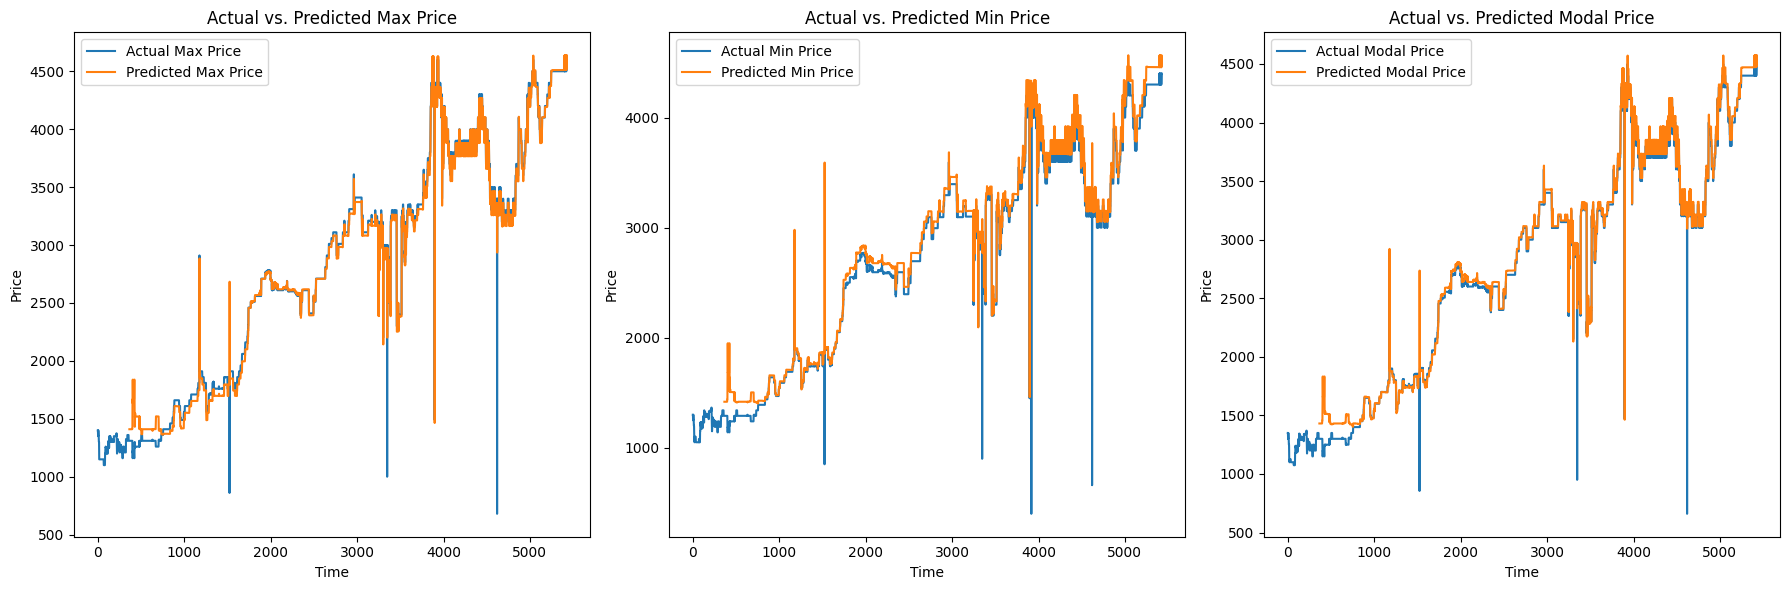

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Actual vs. Predicted Max Price
sns.lineplot(ax=axes[0], x=data.index, y=data['Max Price (Rs./Quintal)'], label='Actual Max Price')
sns.lineplot(ax=axes[0], x=prediction_50_epochs_df.index, y=prediction_50_epochs_df['Predicted_Max'], label='Predicted Max Price')
axes[0].set_title('Actual vs. Predicted Max Price')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot Actual vs. Predicted Min Price
sns.lineplot(ax=axes[1], x=data.index, y=data['Min Price (Rs./Quintal)'], label='Actual Min Price')
sns.lineplot(ax=axes[1], x=prediction_50_epochs_df.index, y=prediction_50_epochs_df['Predicted_Min'], label='Predicted Min Price')
axes[1].set_title('Actual vs. Predicted Min Price')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Price')
axes[1].legend()

# Plot Actual vs. Predicted Modal Price
sns.lineplot(ax=axes[2], x=data.index, y=data['Modal Price (Rs./Quintal)'], label='Actual Modal Price')
sns.lineplot(ax=axes[2], x=prediction_50_epochs_df.index, y=prediction_50_epochs_df['Predicted_Modal'], label='Predicted Modal Price')
axes[2].set_title('Actual vs. Predicted Modal Price')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Price')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


###**For 10 Epochs Model**

After Generate the output create a `dataframe` which contains all the predicted output and actual output

In [ ]:
import numpy as np
import pandas as pd
import torch

# Ensure the model is in evaluation mode
model_10_epochs.eval()

# To store the results
predictions = []

# Function to get predictions
def get_predictions(loader, predictions):
    with torch.no_grad():
        for (x_max_batch, x_min_batch, x_modal_batch), (y_max_batch, y_min_batch, y_modal_batch) in loader:
            x_max_batch, x_min_batch, x_modal_batch = x_max_batch.to('cuda'), x_min_batch.to('cuda'), x_modal_batch.to('cuda')
            y_max_batch, y_min_batch, y_modal_batch = y_max_batch.to('cuda'), y_min_batch.to('cuda'), y_modal_batch.to('cuda')

            outputs_max, outputs_min, outputs_modal = model_10_epochs(x_max_batch, x_min_batch, x_modal_batch)

            predictions.append((outputs_max.cpu().numpy(), outputs_min.cpu().numpy(), outputs_modal.cpu().numpy()))
            # actuals.append((y_max_batch.cpu().numpy(), y_min_batch.cpu().numpy(), y_modal_batch.cpu().numpy()))

# Get predictions for the training data
get_predictions(data_loader, predictions)

# Flatten lists of arrays to single arrays
predictions_max = np.concatenate([pred[0] for pred in predictions]).flatten()
predictions_min = np.concatenate([pred[1] for pred in predictions]).flatten()
predictions_modal = np.concatenate([pred[2] for pred in predictions]).flatten()


# Ensure all arrays are 1-dimensional
print("The Dimentions of the Predicted values ")
print(predictions_max.shape)
print(predictions_min.shape)
print(predictions_modal.shape)

# Scaler inverse transformation
predictions_max = scaler.inverse_transform(predictions_max.reshape(-1, 1)).flatten()
predictions_min = scaler.inverse_transform(predictions_min.reshape(-1, 1)).flatten()
predictions_modal = scaler.inverse_transform(predictions_modal.reshape(-1, 1)).flatten()

# Create DataFrame for predictions and actuals
prediction_10_epochs_df = pd.DataFrame({
    'Predicted_Max': predictions_max,
    'Actual_Max': data['Max Price (Rs./Quintal)'][365:],
    'Predicted_Min': predictions_min,
    'Actual_Min': data['Min Price (Rs./Quintal)'][365:],
    'Predicted_Modal': predictions_modal,
    'Actual_Modal': data['Modal Price (Rs./Quintal)'][365:]
})

# Save the DataFrame to a CSV file
prediction_10_epochs_df.to_csv('predictions_10_epochs.csv', index=False)

# Display the DataFrame
print(prediction_10_epochs_df.head())

The Dimentions of the Predicted values 
(5060,)
(5060,)
(5060,)
     Predicted_Max  Actual_Max  Predicted_Min  Actual_Min  Predicted_Modal  \
365    1310.839355        1310    1204.631592        1290      1281.420776   
366    1310.839355        1310    1204.631592        1290      1281.420776   
367    1310.839355        1310    1204.631592        1290      1281.420776   
368    1310.839355        1310    1204.631592        1290      1281.420776   
369    1310.839355        1310    1204.631592        1290      1281.420776   

     Actual_Modal  
365          1300  
366          1300  
367          1300  
368          1300  
369          1300  


In [ ]:
prediction_10_epochs_df.tail()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
5420,4576.953125,4500,4569.404785,4300,4687.689453,4400
5421,4453.687012,4500,4495.922852,4300,4566.135742,4400
5422,4453.687012,4600,4495.922852,4400,4566.135742,4500
5423,4573.020020,4600,4568.816406,4400,4684.758789,4500
5424,4573.020020,4600,4568.816406,4400,4684.758789,4500


In [ ]:
prediction_10_epochs_df = prediction_10_epochs_df.astype(int)

In [ ]:
prediction_10_epochs_df.head()

,Predicted_Max,Actual_Max,Predicted_Min,Actual_Min,Predicted_Modal,Actual_Modal
365,1410,1310,1418,1290,1431,1300
366,1410,1310,1418,1290,1431,1300
367,1410,1310,1418,1290,1431,1300
368,1410,1310,1418,1290,1431,1300
369,1410,1310,1418,1290,1431,1300


In [ ]:
prediction_10_epochs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 365 to 5424
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Predicted_Max    5060 non-null   int32
 1   Actual_Max       5060 non-null   int32
 2   Predicted_Min    5060 non-null   int32
 3   Actual_Min       5060 non-null   int32
 4   Predicted_Modal  5060 non-null   int32
 5   Actual_Modal     5060 non-null   int32
dtypes: int32(6)
memory usage: 118.7 KB


####**Actual vs predicted plot for 10 Epochs**

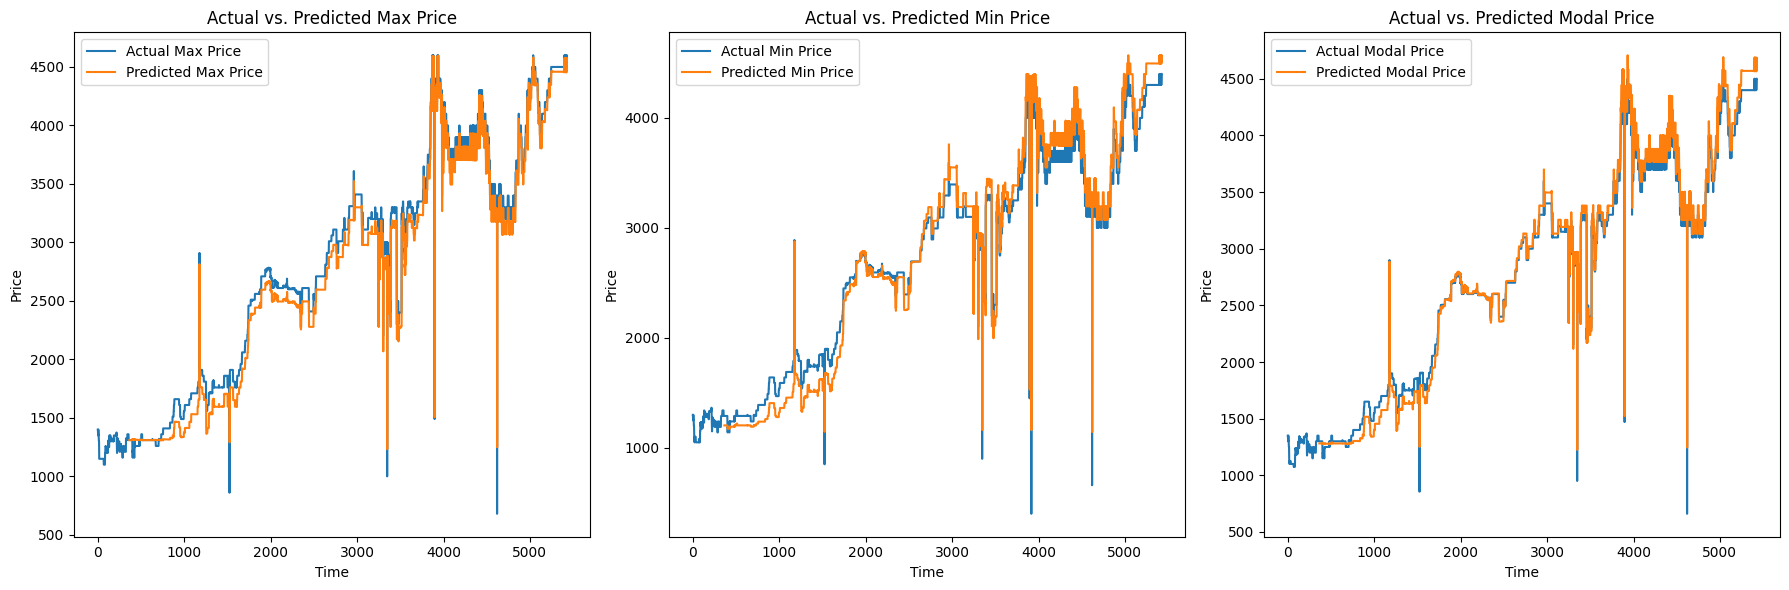

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Actual vs. Predicted Max Price
sns.lineplot(ax=axes[0], x=data.index, y=data['Max Price (Rs./Quintal)'], label='Actual Max Price')
sns.lineplot(ax=axes[0], x=prediction_10_epochs_df.index, y=prediction_10_epochs_df['Predicted_Max'], label='Predicted Max Price')
axes[0].set_title('Actual vs. Predicted Max Price')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot Actual vs. Predicted Min Price
sns.lineplot(ax=axes[1], x=data.index, y=data['Min Price (Rs./Quintal)'], label='Actual Min Price')
sns.lineplot(ax=axes[1], x=prediction_10_epochs_df.index, y=prediction_10_epochs_df['Predicted_Min'], label='Predicted Min Price')
axes[1].set_title('Actual vs. Predicted Min Price')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Price')
axes[1].legend()

# Plot Actual vs. Predicted Modal Price
sns.lineplot(ax=axes[2], x=data.index, y=data['Modal Price (Rs./Quintal)'], label='Actual Modal Price')
sns.lineplot(ax=axes[2], x=prediction_10_epochs_df.index, y=prediction_10_epochs_df['Predicted_Modal'], label='Predicted Modal Price')
axes[2].set_title('Actual vs. Predicted Modal Price')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Price')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()
